In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import os
plt.style.use('publication')


In [2]:
def delay(time : np.ndarray, sig : np.ndarray) -> float : 
    """
    delay return the time delay of the signal

    Parameters
    ----------
    time : np.ndarray
        _description_
    sig : np.ndarray
        _description_

    Returns
    -------
    float
        _description_
    """    
    return time[np.argmax(abs(sig))]

In [3]:
def delay_dispersion(time, signal) -> float: 
    """
    delay_dispersion return the dispersion of the signal given a threshold 1/e * max(signal)

    Parameters
    ----------
    time : np.ndarray
        _description_
    signal : np.ndarray
        _description_

    Returns
    -------
    float
        _description_
    """    
    mask = np.abs(signal) > np.exp(-1) * np.max(np.abs(signal))
    time_window = time[mask]
    
    return (time_window[-1] - time_window[0]) / 2 

In [4]:
import scipy.constants as cst
n_c = 50e9 ** 2 /cst.e**2*(cst.m_e*cst.epsilon_0)
dt = 2.4509803921568632e-12

### Importing data

In [24]:
amplitude_norm = []
pulse_norm = []
delay_list_norm = []
std_list = []
dir = os.listdir('../../output/normalized_linear_profile')
for i , subfolder in tqdm(enumerate(dir)) :
    if subfolder[0] == 'a' : 
        IQ_list = np.array([np.load(f'../../output/normalized_linear_profile/{subfolder}/{file}') for file in os.listdir(f'../../output/normalized_linear_profile/{subfolder}') if file[0] == 'I'])
        std_list.append( np.array([np.load(f'../../output/normalized_linear_profile/{subfolder}/{file}',  allow_pickle=True) for file in os.listdir(f'../../output/normalized_linear_profile/{subfolder}') if file[0] == 's']))
        amplitude_norm.append(float(subfolder.split('_')[1]))
        pulse_norm.append(IQ_list[:,1])
        delay_list_norm.append([delay(*IQ) for IQ in IQ_list])

0it [00:00, ?it/s]

In [25]:
np.save('../extract_data/delay_list_norm', delay_list_norm)
np.save('../extract_data/pulse_norm', pulse_norm)
np.save('../extract_data/amplitude_norm', amplitude_norm)

In [6]:
pulse_norm = np.load('../extract_data/pulse_norm.npy')
delay_list_norm = np.load('../extract_data/delay_list_norm.npy')
amplitude_norm = np.load('../extract_data/amplitude_norm.npy')

In [7]:
pulse_4 = np.load('../extract_data/pulse_4.npy')
delay_list_4 = np.load('../extract_data/delay_list_4.npy')
amplitude_4 = np.load('../extract_data/amplitude_4.npy')

In [5]:
pulse_quad = np.load('../extract_data/pulse_quad.npy')
delay_list_quad = np.load('../extract_data/delay_list_quad.npy')
amplitude_quad = np.load('../extract_data/amplitude_quad.npy')

In [8]:

amp = np.std(pulse_norm, axis = 2)
amp_2 = np.std(pulse_4, axis = 2)
amp_3 = np.std(pulse_quad, axis = 2)

In [9]:
index = np.argsort(amplitude_norm)
index_2 = np.argsort(amplitude_4)
index_3 = np.argsort(amplitude_quad)

In [10]:
rms_n, rms_td = np.load('../extract_data/1d.npy')

In [11]:
dt_theo =  2 * 0.1 / 3e8 * np.sqrt(10) * np.array(rms_n)

### Studying the std of the variables

In [13]:
from matplotlib.markers import MarkerStyle

In [12]:
nc2 = 3e10 /(2 * np.pi * 50e9 * np.sqrt(1 * 10 * np.log(10)))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0001, 5)

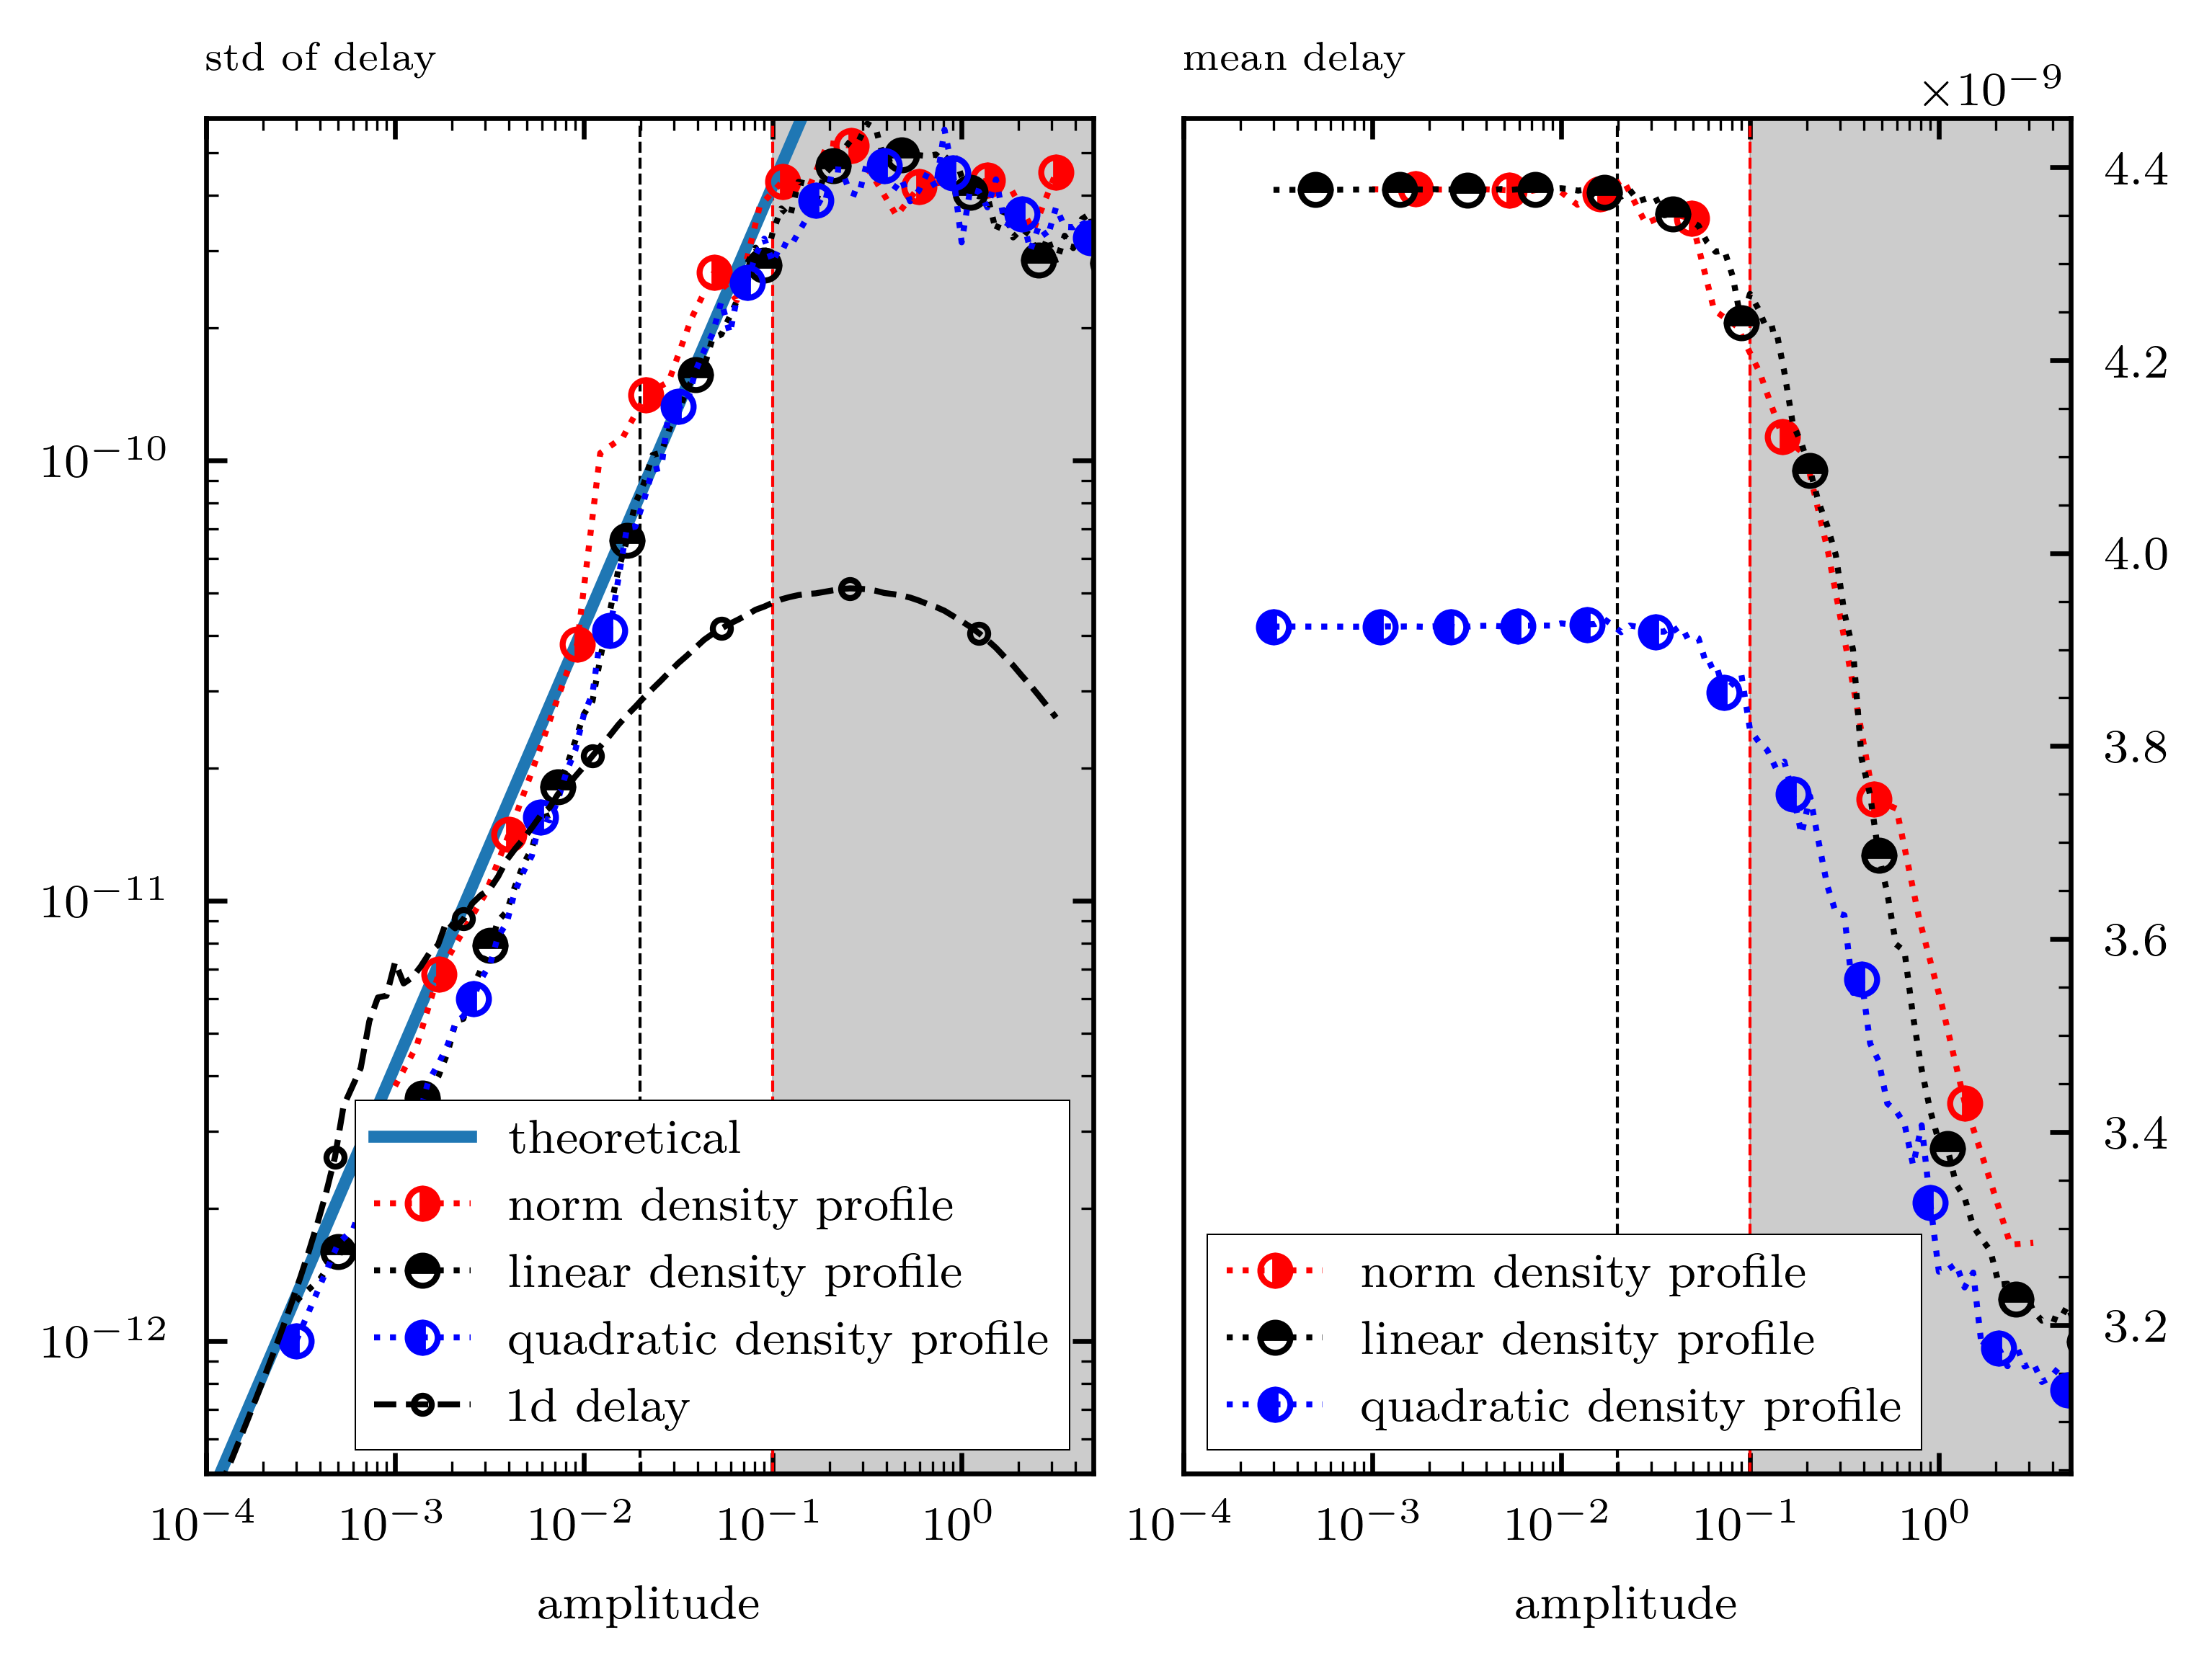

In [24]:
W = 5
fig, ax = plt.subplots(1,2, figsize = (W, W * 3/4))
ax[0].set_title('std of delay', fontsize='small',
    loc='left',
    fontweight='bold',
    style='italic',)
ax[0].axvline(0.1, color = 'r', ls = '--', lw = .5)
ax[0].axvline(nc2, color = 'k', ls = '--', lw = .5)
ax[0].loglog(rms_n,2 *  dt_theo  , label='theoretical', ls = '-', lw  = 2)

ax[0].plot(amplitude_norm[index], np.std(delay_list_norm, axis = 1)[index], marker =MarkerStyle("o", fillstyle="right"), label = 'norm density profile', lw = 1, markevery = (2, 3), ms = 5, color = 'r', ls = ':')
ax[0].plot(amplitude_4[index_2], np.std(delay_list_4, axis = 1)[index_2], marker = MarkerStyle("o", fillstyle="top"), label = 'linear density profile', lw = 1, markevery = (2,8), ms = 5, color = 'k', ls = ':')
ax[0].plot(amplitude_quad[index_3], np.std(delay_list_quad, axis = 1)[index_3], marker = MarkerStyle("o", fillstyle="left"), label = 'quadratic density profile', lw = 1, markevery = 8, ms = 5, color = 'b', ls = ':')

ax[0].plot(rms_n, rms_td, label = '1d delay', lw = 1,  marker ='o', mfc = 'none', color = 'k', markevery = 15, ms = 3, ls = '--'  )

ax[0].set_xlim(1e-4, 5)
ax[0].legend(loc = 'lower right')
ax[0].axvspan(0.1, 5, alpha = 0.2, color = 'k')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylim(0.5e-12, 6e-10)
ax[0].set_xlabel('amplitude')
ax[1].set_title('mean delay', fontsize='small',
    loc='left',
    fontweight='bold',
    style='italic',)

ax[1].set_xlabel('amplitude')

ax[1].legend(loc = 'lower right')
ax[1].set_xscale('log')
ax[1].axvline(0.1, color = 'r', ls = '--', lw = .5)
ax[1].axvline(nc2, color = 'k', ls = '--', lw = .5)

ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()

ax[1].plot(amplitude_norm[index], np.mean(delay_list_norm, axis = 1)[index], marker =MarkerStyle("o", fillstyle="right"), label = 'norm density profile', lw = 1, markevery = (2, 4), ms = 5, color = 'r', ls = ':')
ax[1].plot(amplitude_4[index_2], np.mean(delay_list_4, axis = 1)[index_2], marker = MarkerStyle("o", fillstyle="top"), label = 'linear density profile', lw = 1, markevery = (2,8), ms = 5, color = 'k', ls = ':')
ax[1].plot(amplitude_quad[index_3], np.mean(delay_list_quad, axis = 1)[index_3], marker = MarkerStyle("o", fillstyle="left"), label = 'quadratic density profile', lw = 1, markevery = 8, ms = 5, color = 'b', ls = ':')

ax[1].axvspan(0.1, 10, alpha = 0.2, color = 'k')
# ax[1].se_)yscale('log')
ax[1].legend(loc = 'lower left')
ax[1].set_xlim(1e-4, 5)

# plt.savefig('../Report/figures/delay_amp_norm_2.png', dpi = 300)

In [58]:

FWHM =  [np.mean([delay_dispersion(np.arange(0, 2893) * dt, pulse) for pulse in pulse_group]) for pulse_group in pulse_norm]
FWHM_2 =  [np.mean([delay_dispersion(np.arange(0, 2893) * dt, pulse) for pulse in pulse_group]) for pulse_group in pulse_4]
FWHM_3 =  [np.mean([delay_dispersion(np.arange(0, 2893) * dt, pulse) for pulse in pulse_group]) for pulse_group in pulse_quad]


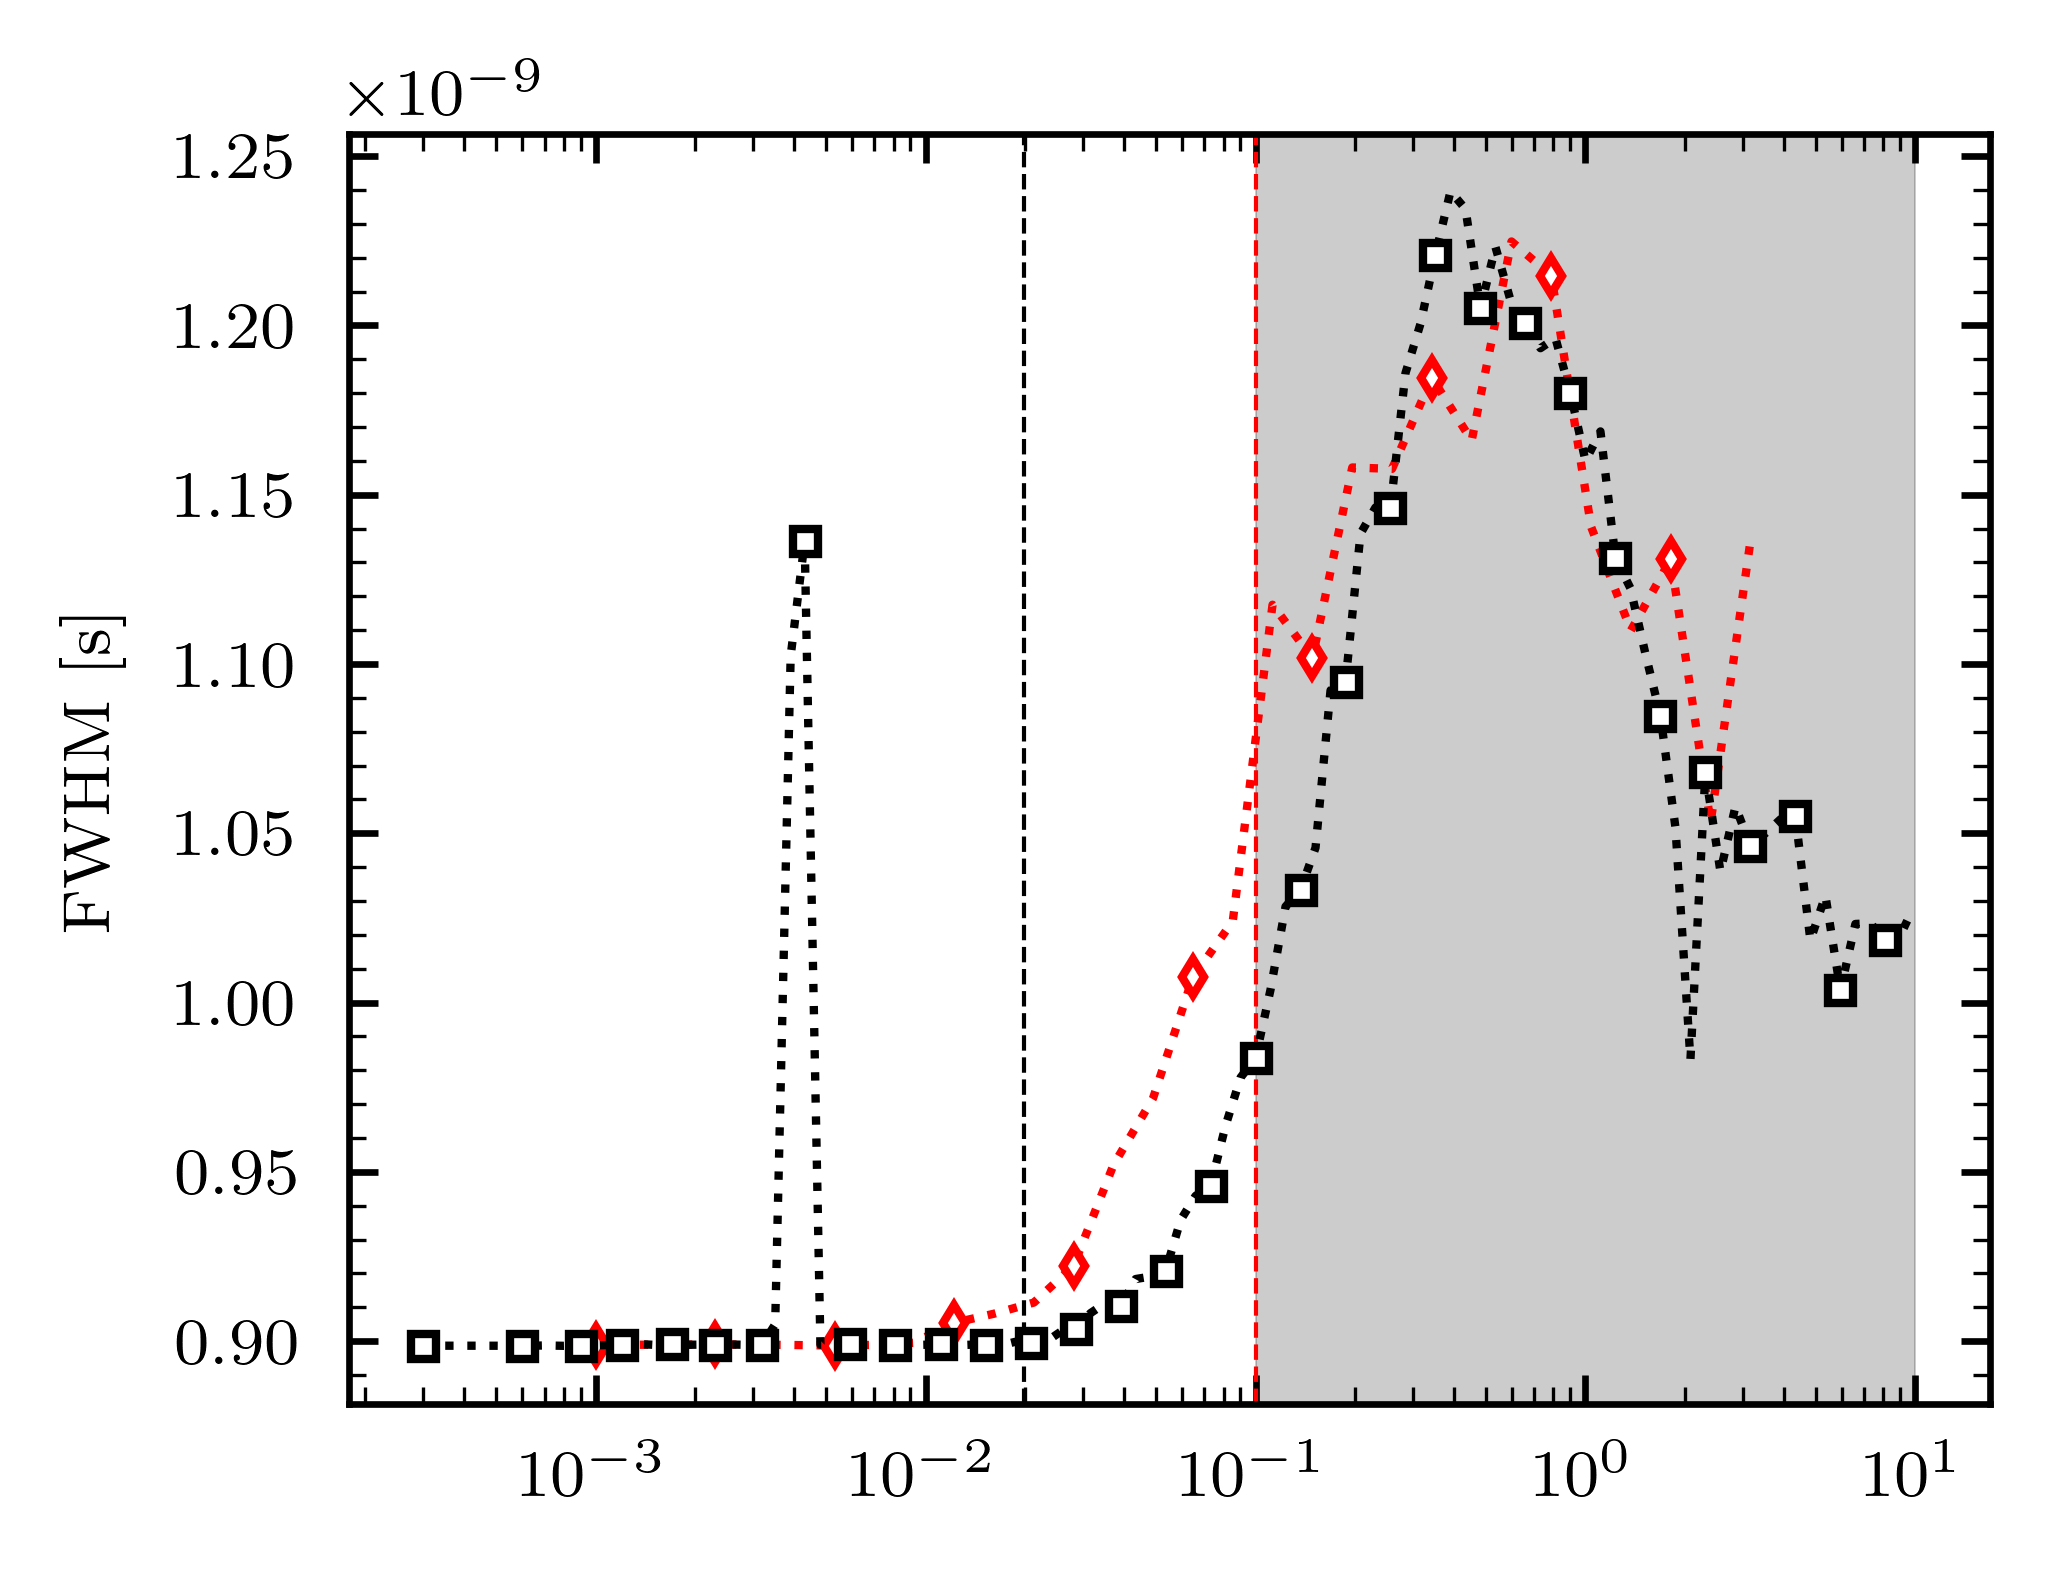

In [60]:
fig, ax = plt.subplots()

ax.set_xscale('log')
ax.axvline(0.1, color = 'r', ls = '--', lw = .5)
ax.axvline(nc2, color = 'k', ls = '--', lw = .5)
ax.plot(amplitude_norm[index],FWHM, marker = MarkerStyle("o", fillstyle="right"), label = 'norm density', lw = 1, markevery = 3, ms = 3, mfc = 'white', color = 'r', ls = ':')
ax.plot(amplitude_4[index_2], FWHM_2 , marker =MarkerStyle("o", fillstyle="top"), label = 'linear density', lw = 1, markevery = 3, ms = 3, mfc = 'white', color = 'k', ls = ':')
ax.plot(amplitude_4[index_2], FWHM_3 , marker =MarkerStyle("o", fillstyle="left"), label = 'linear density', lw = 1, markevery = 3, ms = 3, mfc = 'white', color = 'k', ls = ':')

ax.axvspan(0.1, 10, alpha = 0.2, color = 'k')
ax.set_ylabel('FWHM [s]')


### Studying the mean of the variable

/home/andrea/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


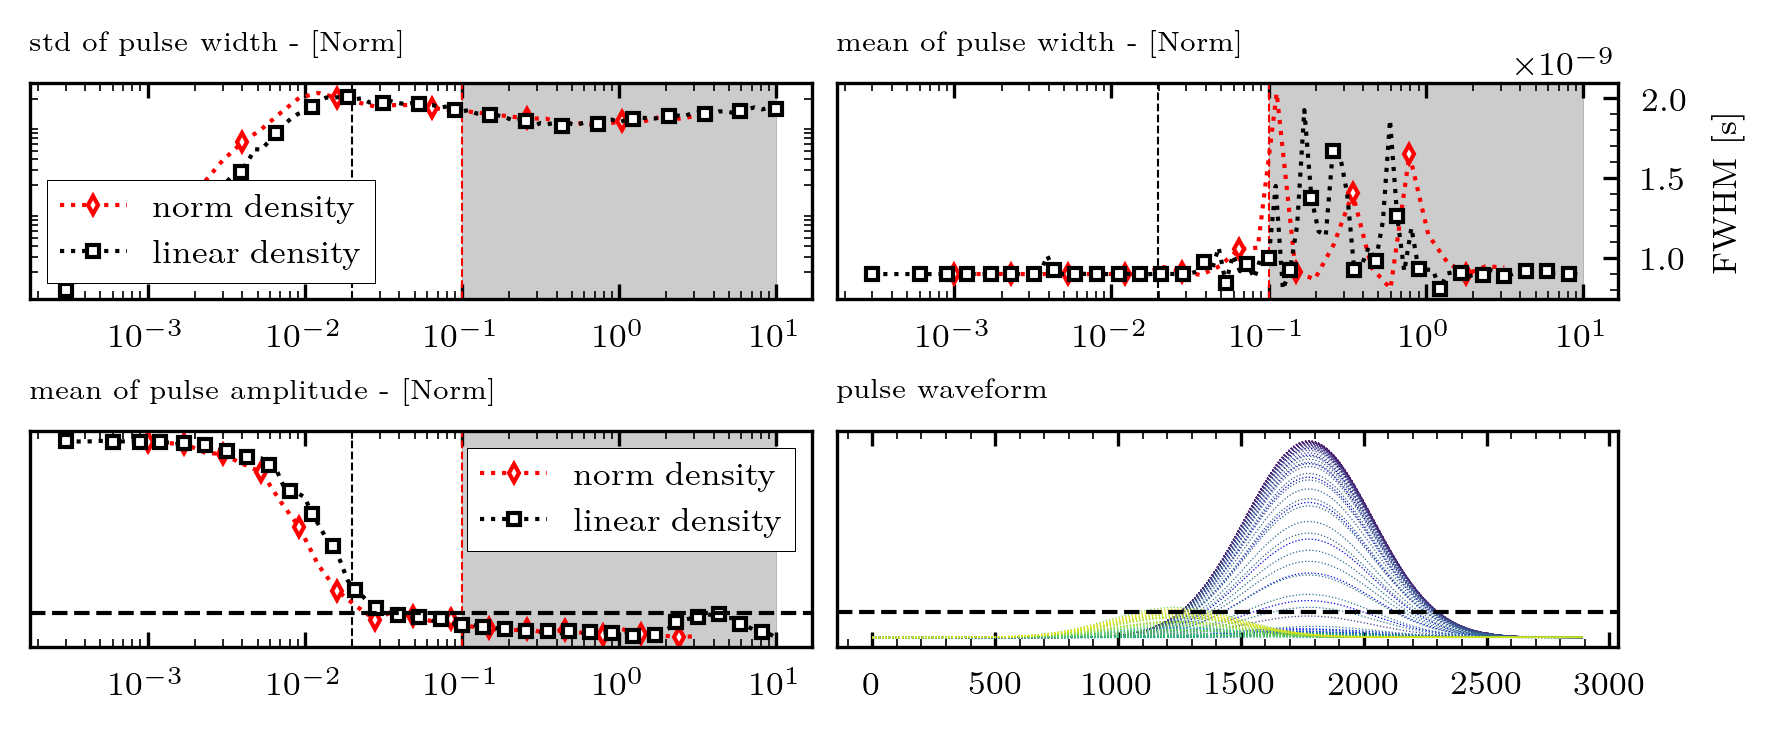

In [53]:
W = 5.8   
fig, ax = plt.subplots(2, 2, figsize = (W, W * 2 / 5), dpi = 300)
ax = ax.flatten()
ax[0].set_title('std of pulse width - [Norm]', fontsize='small',
    loc='left',
    fontweight=1000,
    style='italic',)
ax[0].axvline(0.1, color = 'r', ls = '--', lw = .5)
ax[0].axvline(nc2, color = 'k', ls = '--', lw = .5)
ax[0].plot(amplitude_norm[index], np.std(amp, axis = 1)[index], marker = 'd', label = 'norm density', lw = 1, markevery = 5, ms = 3, mfc = 'white', color = 'r', ls = ':')
ax[0].plot(amplitude_4[index_2], np.std(amp_2, axis = 1)[index_2], marker = 's', label = 'linear density ', lw = 1, markevery = 5, ms = 3, mfc = 'white', color = 'k', ls = ':')

ax[0].legend(loc = 'lower left')
ax[0].axvspan(0.1, 10, alpha = 0.2, color = 'k')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_yticks([])

ax[1].set_title('pulse width oof Average - [Norm]', fontsize='small',
    loc='left',
    fontweight=1000,
    style='italic',)


ax[1].set_xscale('log')
ax[1].axvline(0.1, color = 'r', ls = '--', lw = .5)
ax[1].axvline(nc2, color = 'k', ls = '--', lw = .5)
ax[1].yaxis.set_label_position("right")
FWHM =  [delay_dispersion(np.arange(0, 2893) * dt, np.mean(pulse, axis = 0)) for pulse in pulse_norm]
FWHM_2 =  [delay_dispersion(np.arange(0, 2893) * dt, np.mean(pulse, axis = 0)) for pulse in pulse_4]

ax[1].plot(amplitude_norm[index],FWHM, marker = 'd', label = 'norm density', lw = 1, markevery = 3, ms = 3, mfc = 'white', color = 'r', ls = ':')
ax[1].plot(amplitude_4[index_2], FWHM_2 , marker = 's', label = 'linear density', lw = 1, markevery = 3, ms = 3, mfc = 'white', color = 'k', ls = ':')
ax[1].axvspan(0.1, 10, alpha = 0.2, color = 'k')
ax[1].set_ylabel('FWHM [s]')
# ax[1].legend(loc = 'lower left')
ax[1].yaxis.tick_right()
mean_pulse = np.max(pulse_norm, axis = 2)
mean_pulse_2 = np.max(pulse_4, axis = 2)

ax[2].set_title('mean of pulse amplitude - [Norm]', fontsize='small',
    loc='left',
    fontweight=1000,
    style='italic',)
ax[2].axvline(0.1, color = 'r', ls = '--', lw = .5)
ax[2].axvline(nc2, color = 'k', ls = '--', lw = .5)
ax[2].plot(amplitude_norm[index], np.mean(mean_pulse, axis = 1)[index], marker = 'd', label = 'norm density', lw = 1, markevery = 2, ms = 3, mfc = 'white', color = 'r', ls = ':')
ax[2].plot(amplitude_4[index_2], np.mean(mean_pulse_2, axis = 1)[index_2], marker = 's', label = 'linear density', lw = 1, markevery = 3, ms = 3, mfc = 'white', color = 'k', ls = ':')

ax[2].legend()
ax[2].axvspan(0.1, 10, alpha = 0.2, color = 'k')
ax[2].set_xscale('log')
ax[2].set_yticks([])
ax[2].axhline(450, color = 'k', ls = '--', lw = 1)


ax[3].set_title('pulse waveform', fontsize='small',
    loc='left',
    fontweight=1000,
    style='italic',)

ax[3].set_prop_cycle(color=plt.cm.jet(np.linspace(0, 1, 100)))
ax[3].plot(abs(np.mean(pulse_norm, axis = 1).T), lw = .3, ls = ':')
ax[3].set_prop_cycle(color=plt.cm.viridis(np.linspace(0, 1, 100)))
ax[3].plot(abs(np.mean(pulse_4, axis = 1).T), lw = .3,  ls = ':')

ax[3].set_yticks([])
ax[3].axhline(400, color = 'k', ls = '--', lw = 1)
plt.show()

### Skewness study

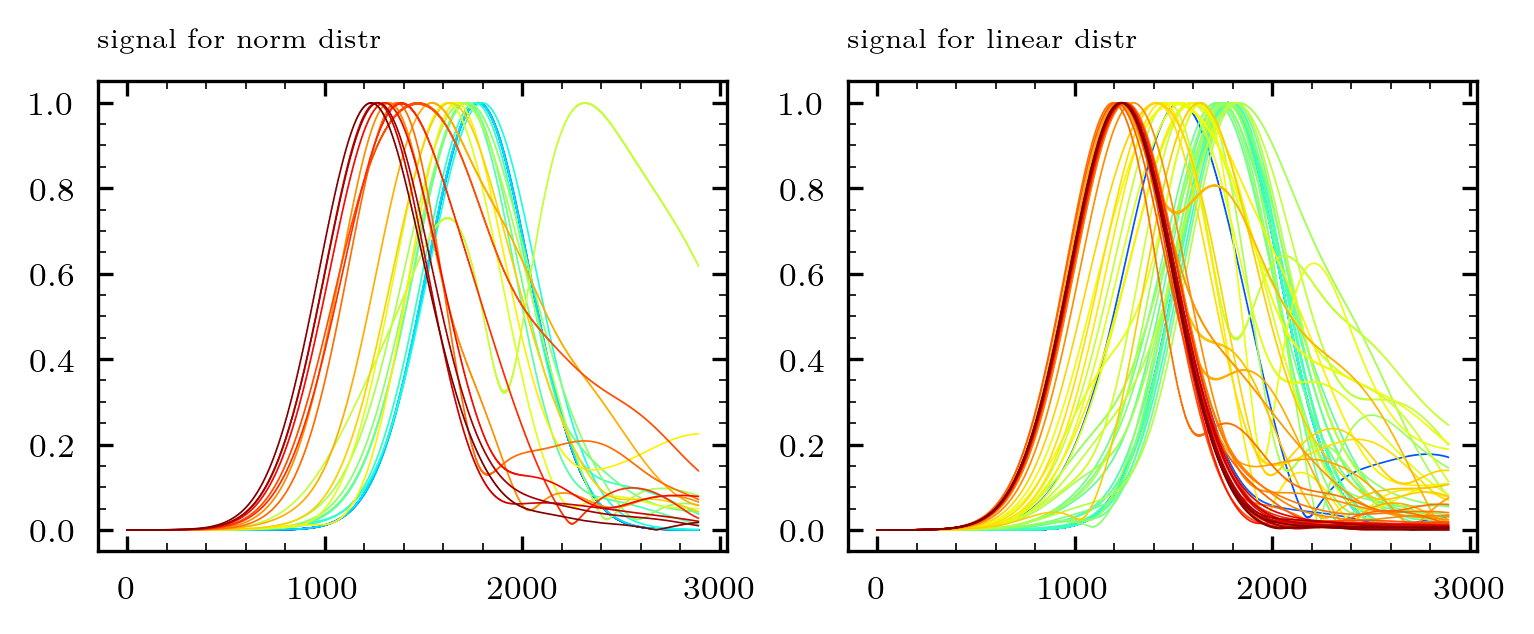

In [56]:
fig, ax = plt.subplots(1, 2, figsize = (W, W * 2 / 5), dpi = 300)
ax[0].set_title('signal for norm distr', fontsize='small',
    loc='left',
    fontweight='bold',
    style='italic',)
ax[0].set_prop_cycle(color=plt.cm.jet(np.linspace(0, 1, 30)))
mean_pulse = abs(np.mean(pulse_norm, axis = 1))
ax[0].plot((mean_pulse.T/ np.max(mean_pulse, axis = 1)), lw = .4)

ax[1].set_prop_cycle(color=plt.cm.jet(np.linspace(0, 1, 96)))
mean_pulse = abs(np.mean(pulse_4, axis = 1))
ax[1].plot((mean_pulse.T/ np.max(mean_pulse, axis = 1)), lw = .4)
ax[1].set_title('signal for linear distr', fontsize='small',
    loc='left',
    fontweight='bold',
    style='italic',)
plt.show()

In [50]:
from scipy.stats import skew

/home/andrea/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


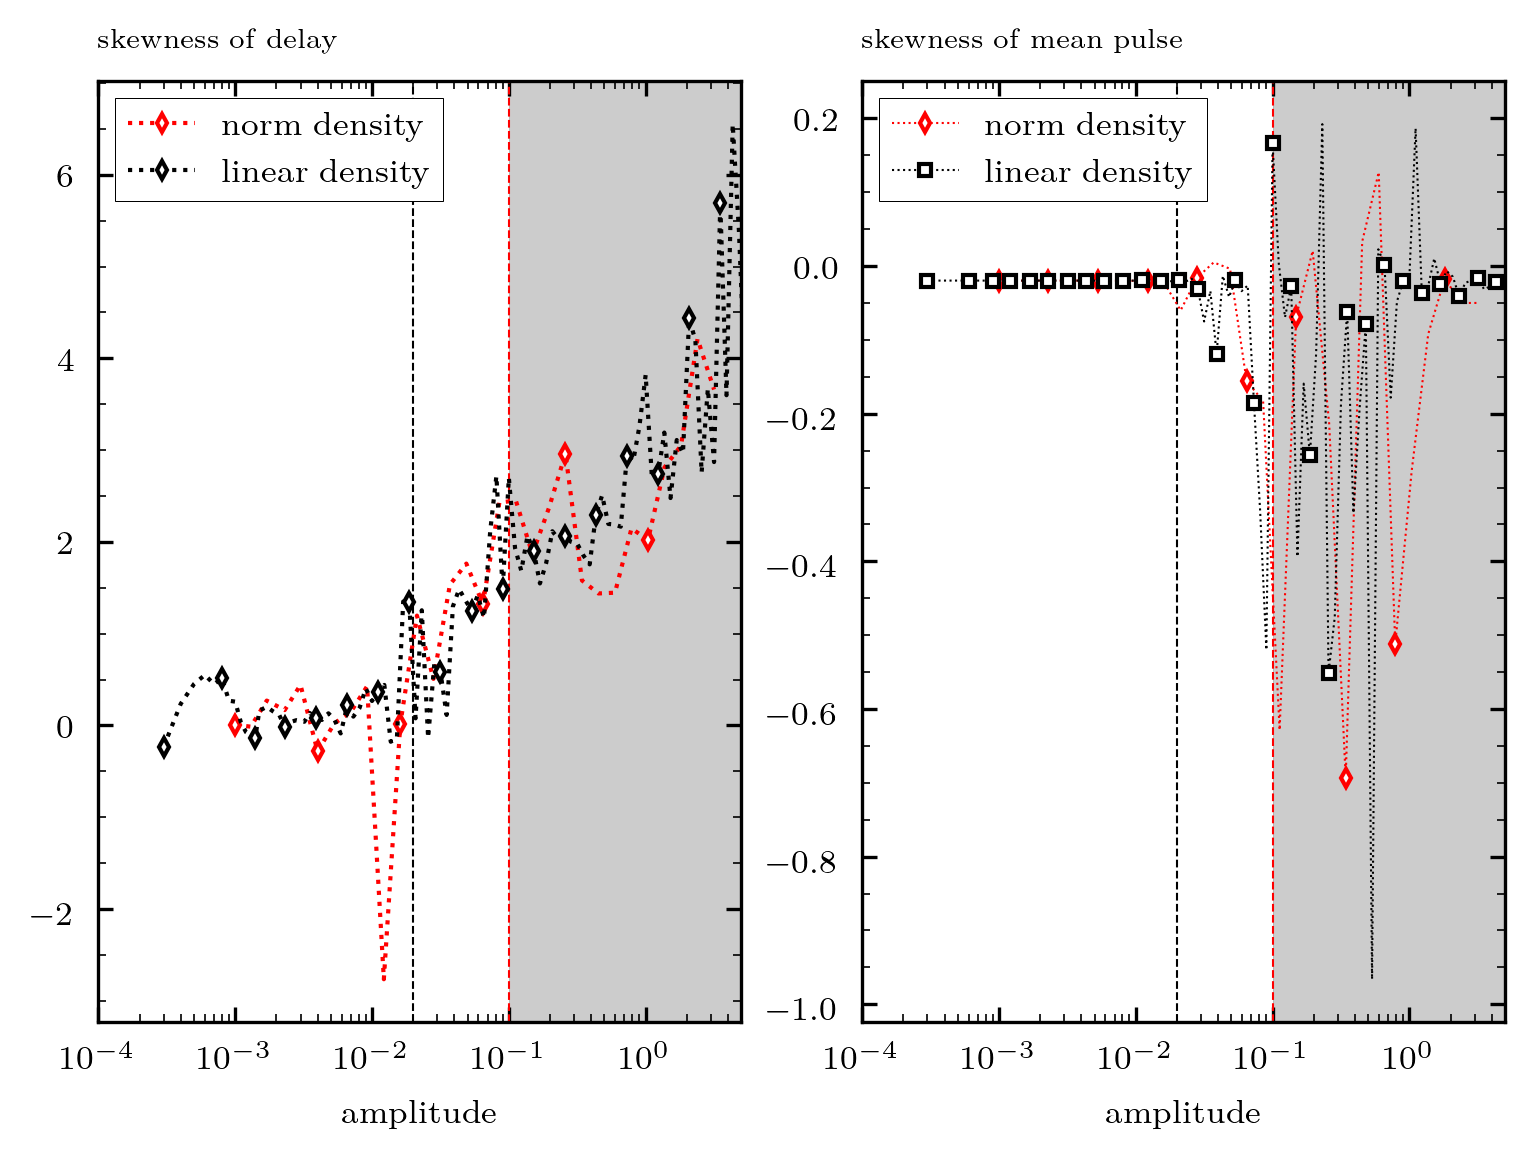

In [55]:
W = 5
fig, ax = plt.subplots(1, 2, figsize = (W, W * 3 / 4), dpi = 300)
ax[0].set_title('skewness of delay', fontsize='small',
    loc='left',
    fontweight='bold',
    style='italic',)
ax[0].axvline(0.1, color = 'r', ls = '--', lw = .5)
ax[0].axvline(nc2, color = 'k', ls = '--', lw = .5)
ax[0].plot(amplitude_norm[index], skew(delay_list_norm, axis = 1)[index], marker = 'd', label = 'norm density', lw = 1, markevery = 5, ms = 3, mfc = 'white', color = 'r', ls = ':')
ax[0].plot(amplitude_4[index_2], skew(delay_list_4, axis = 1)[index_2], marker = 'd', label = 'linear density', lw = 1, markevery = 5, ms = 3, mfc = 'white', color = 'k', ls = ':')

ax[0].set_xlim(1e-4, 5)
ax[0].axvspan(0.1, 5, alpha = 0.2, color = 'k')
ax[0].set_xscale('log')
ax[0].set_xlabel('amplitude')
ax[0].legend()
ax[1].set_title('skewness of mean pulse', fontsize='small',
    loc='left',
    fontweight='bold',
    style='italic',)

ax[1].set_xlabel('amplitude')
ax[1].set_xscale('log')

ax[1].axvline(0.1, color = 'r', ls = '--', lw = .5)
ax[1].axvline(nc2, color = 'k', ls = '--', lw = .5)
ax[1].yaxis.set_label_position("right")
mean_pulse = abs(np.mean(pulse_norm, axis = 1))[index]
mean_pulse = [mp[np.argmax(mp) - 550:np.argmax(mp)+550] for mp in mean_pulse]

mean_pulse_2 = abs(np.mean(pulse_4, axis = 1))[index_2]
mean_pulse_2 = [mp[np.argmax(mp) - 550:np.argmax(mp)+550] for mp in mean_pulse_2]

ax[1].plot(amplitude_norm[index], skew(mean_pulse, axis = 1), marker = 'd', label = 'norm density', lw = .5, markevery = 3, ms = 3, mfc = 'white', color = 'r', ls = ':')
ax[1].plot(amplitude_4[index_2], skew(mean_pulse_2, axis = 1), marker = 's', label = 'linear density', lw = .5, markevery = 3, ms = 3, mfc = 'white', color = 'k', ls = ':')

ax[1].axvspan(0.1, 10, alpha = 0.2, color = 'k')
ax[1].set_xlim(1e-4, 5)
ax[1].legend()


GAUSSIAN FIT

In [53]:
from scipy.optimize import curve_fit

def gaussian(x, a : float, b: float,  c : float) : 
    return a * np.exp(- (b - x) ** 2 /(2 * c ** 2))

cf = np.array([curve_fit(gaussian, range(len(pulse)), pulse, p0 = [300, 1500, 500], )[0] for pulse in abs(np.mean(pulse_norm, axis = 1))])
cf_2 = np.array([curve_fit(gaussian, range(len(pulse)), pulse, p0 = [300, 1500, 500], )[0] for pulse in abs(np.mean(pulse_4, axis = 1))])

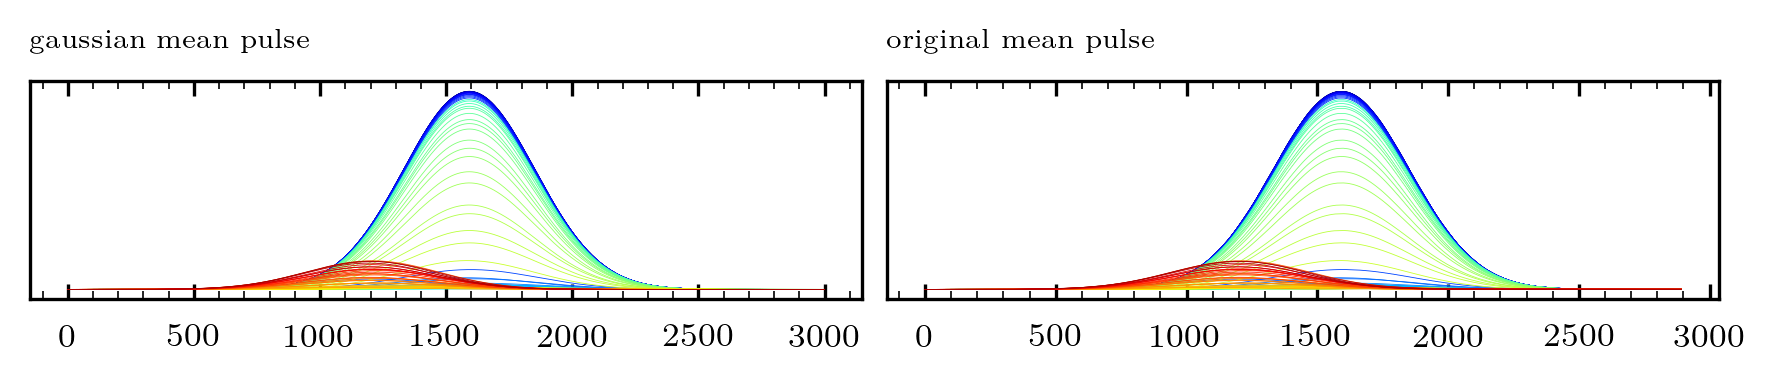

In [20]:
W = 5.8   

fig, ax = plt.subplots(1,2,  figsize = (W, W * 1 / 5), dpi = 300)

ax[0].set_prop_cycle(color=plt.cm.jet(np.linspace(0, 1, 100)))
ax[0].plot(np.array([gaussian(np.arange(3000), *p_opt) for p_opt in cf]).T, lw = .2)
ax[0].set_title('gaussian mean pulse', fontsize='small',
    loc='left',
    fontweight='bold',
    style='italic',)
ax[0].set_yticks([])

ax[1].set_prop_cycle(color=plt.cm.jet(np.linspace(0, 1, 100)))
ax[1].plot(abs(np.mean(pulse_norm, axis = 1).T), lw = .2)
ax[1].set_title('original mean pulse', fontsize='small',
    loc='left',
    fontweight='bold',
    style='italic',)
ax[1].set_yticks([])

plt.show()

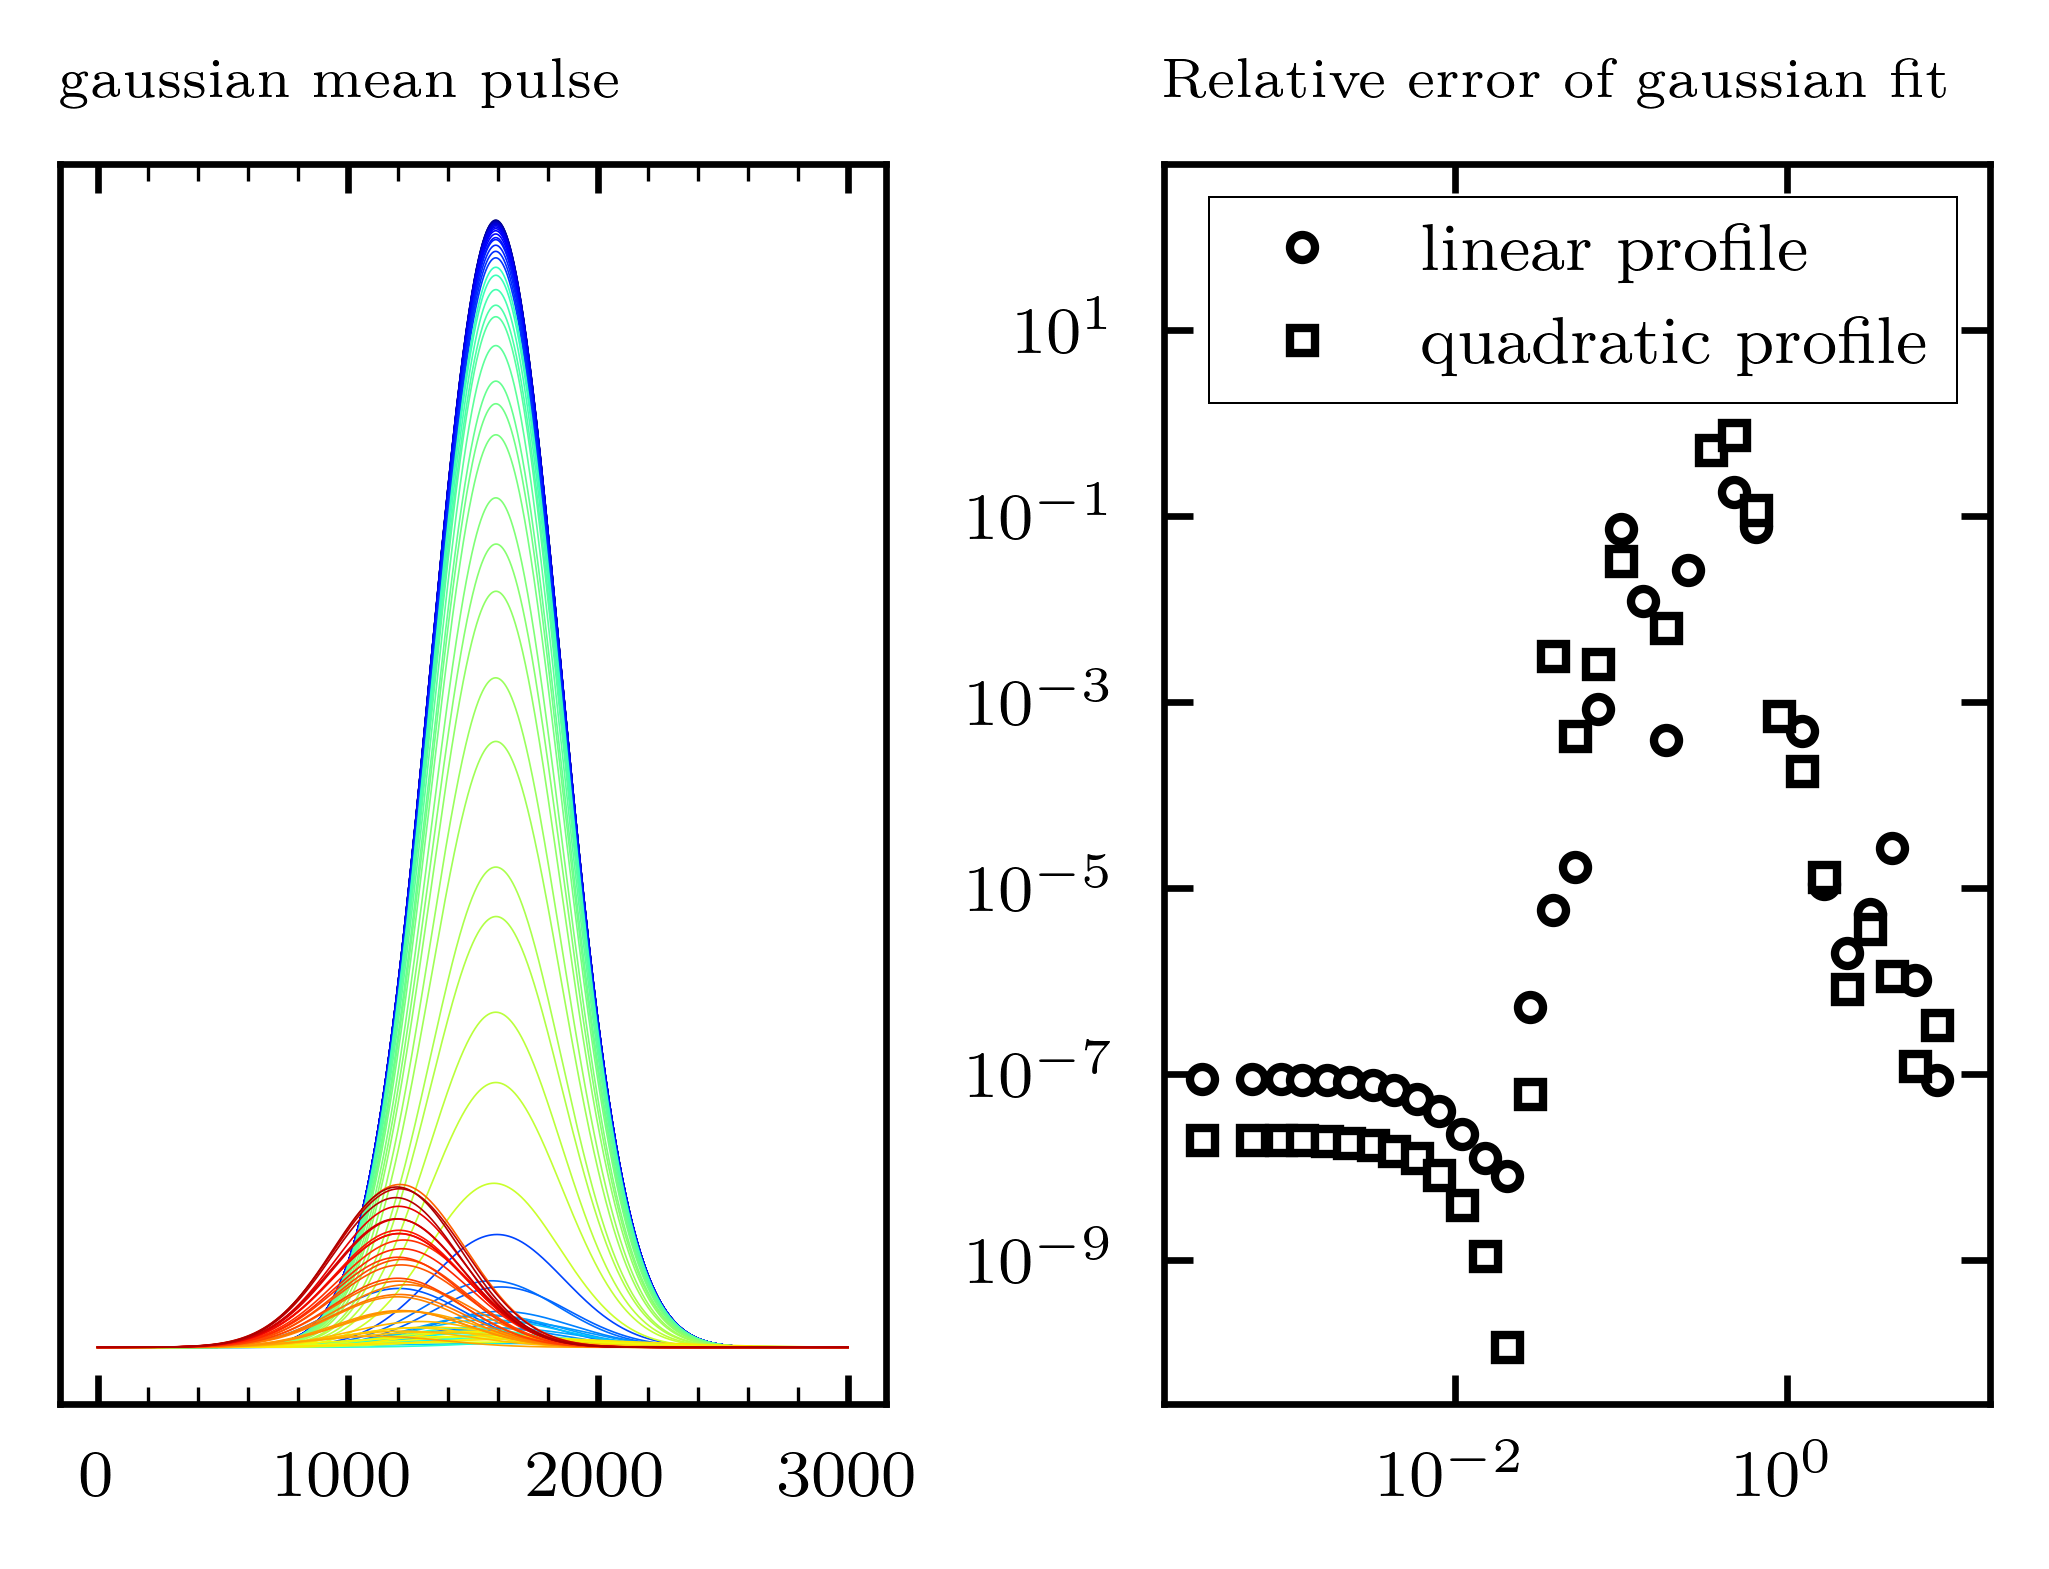

In [56]:
fig, ax = plt.subplots(1,2)
cf_cov = np.array([np.sum(np.diag(curve_fit(gaussian, range(len(pulse)), pulse, p0 = [300, 1500, 500])[1]) ** 2) for pulse in abs(np.mean(pulse_norm, axis = 1))])
cf_cov_2 = np.array([np.sum(np.diag(curve_fit(gaussian, range(len(pulse)), pulse, p0 = [300, 1500, 500])[1]) ** 2) for pulse in abs(np.mean(pulse_4, axis = 1))])

ax[0].set_prop_cycle(color=plt.cm.jet(np.linspace(0, 1, 100)))
ax[0].plot(np.array([gaussian(np.arange(3000), *p_opt) for p_opt in cf]).T, lw = .2)
ax[0].set_title('gaussian mean pulse', fontsize='small',
    loc='left',
    fontweight='bold',
    style='italic',)
ax[0].set_yticks([])

ax[1].plot(amplitude_norm[index], cf_cov[index] / cf[:,0][index], marker = 'o', label = 'linear profile', lw = 0, markevery = 3, ms = 3, mfc = 'white', color = 'k')
ax[1].plot(amplitude_4[index_2], cf_cov_2[index_2] / cf_2[:,0][index_2], marker = 's', label = 'normratic profile', lw = 0, markevery = 3, ms = 3, mfc = 'white', color = 'k')

ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_title('Relative error of gaussian fit', fontsize='small',
    loc='left',
    fontweight='bold',
    style='italic',)
ax[1].legend()

In [22]:
from scipy.signal import find_peaks

In [26]:
peaks_prop = {'num_spikes' : [], 'peak_widths' : [], 'peak_height' : []}
for i,amp in enumerate(amplitude_norm) : 
    num_spikes = []
    for sample in pulse_norm[i] : 
        peaks, _ = find_peaks(sample,  height = 200, distance = 100, width=100)
        num_spikes.append(len(peaks))
        
    peaks_prop['num_spikes'].append(num_spikes)
    peaks_prop['peak_widths'].append(_['widths'])
    peaks_prop['peak_height'].append(_['peak_heights'])

In [27]:
peaks_prop['peak_widths'] = [peaks_prop['peak_widths'][i] if len(peaks_prop['peak_widths'][i]) > 0 else [0] for i in range(len(peaks_prop['peak_widths']))]
peaks_prop['peak_height'] = [peaks_prop['peak_height'][i] if len(peaks_prop['peak_height'][i]) > 0 else [0] for i in range(len(peaks_prop['peak_height']))]

Text(0.5, 0, 'amplitude')

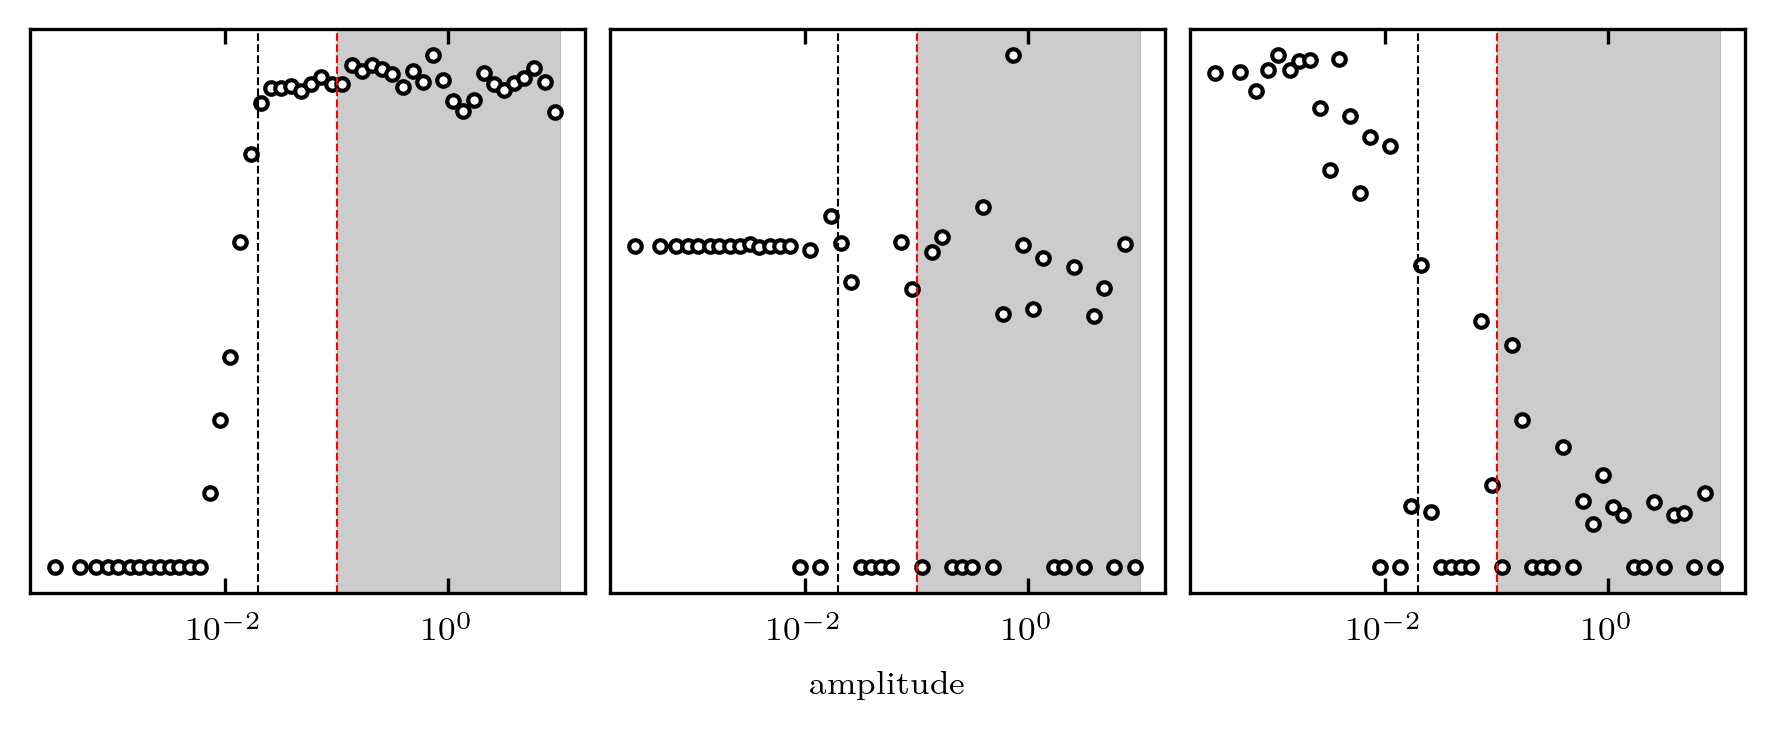

In [28]:
W = 5.8
fig, ax = plt.subplots(1,3, figsize = (W, W * 2/ 5), dpi = 300)
ax[0].plot(amplitude_norm[index], np.std(peaks_prop['num_spikes'], axis = 1)[index],  marker = 'o', label = 'mean delay', lw = 0, markevery = 2, ms = 3, mfc = 'white', color = 'k')
ax[1].plot(amplitude_norm[index], np.max(peaks_prop['peak_widths'], axis = 1)[index], marker = 'o', label = 'max delay', lw = 0, markevery = 2, ms = 3, mfc = 'white', color = 'k')
ax[2].plot(amplitude_norm[index], np.max(peaks_prop['peak_height'], axis = 1)[index], marker = 'o', label = 'mean delay', lw = 0, markevery = 2, ms = 3, mfc = 'white', color = 'k')

for ax_ in ax : 
    ax_.set_xscale('log')
    ax_.axvline(0.1, color = 'r', ls = '--', lw = .5)
    ax_.axvline(nc2, color = 'k', ls = '--', lw = .5)
    ax_.axvspan(0.1, 10, alpha = 0.2, color = 'k')
    ax_.set_yticks([])
ax[1].set_xlabel('amplitude')


Text(0.5, 0, 'amplitude')

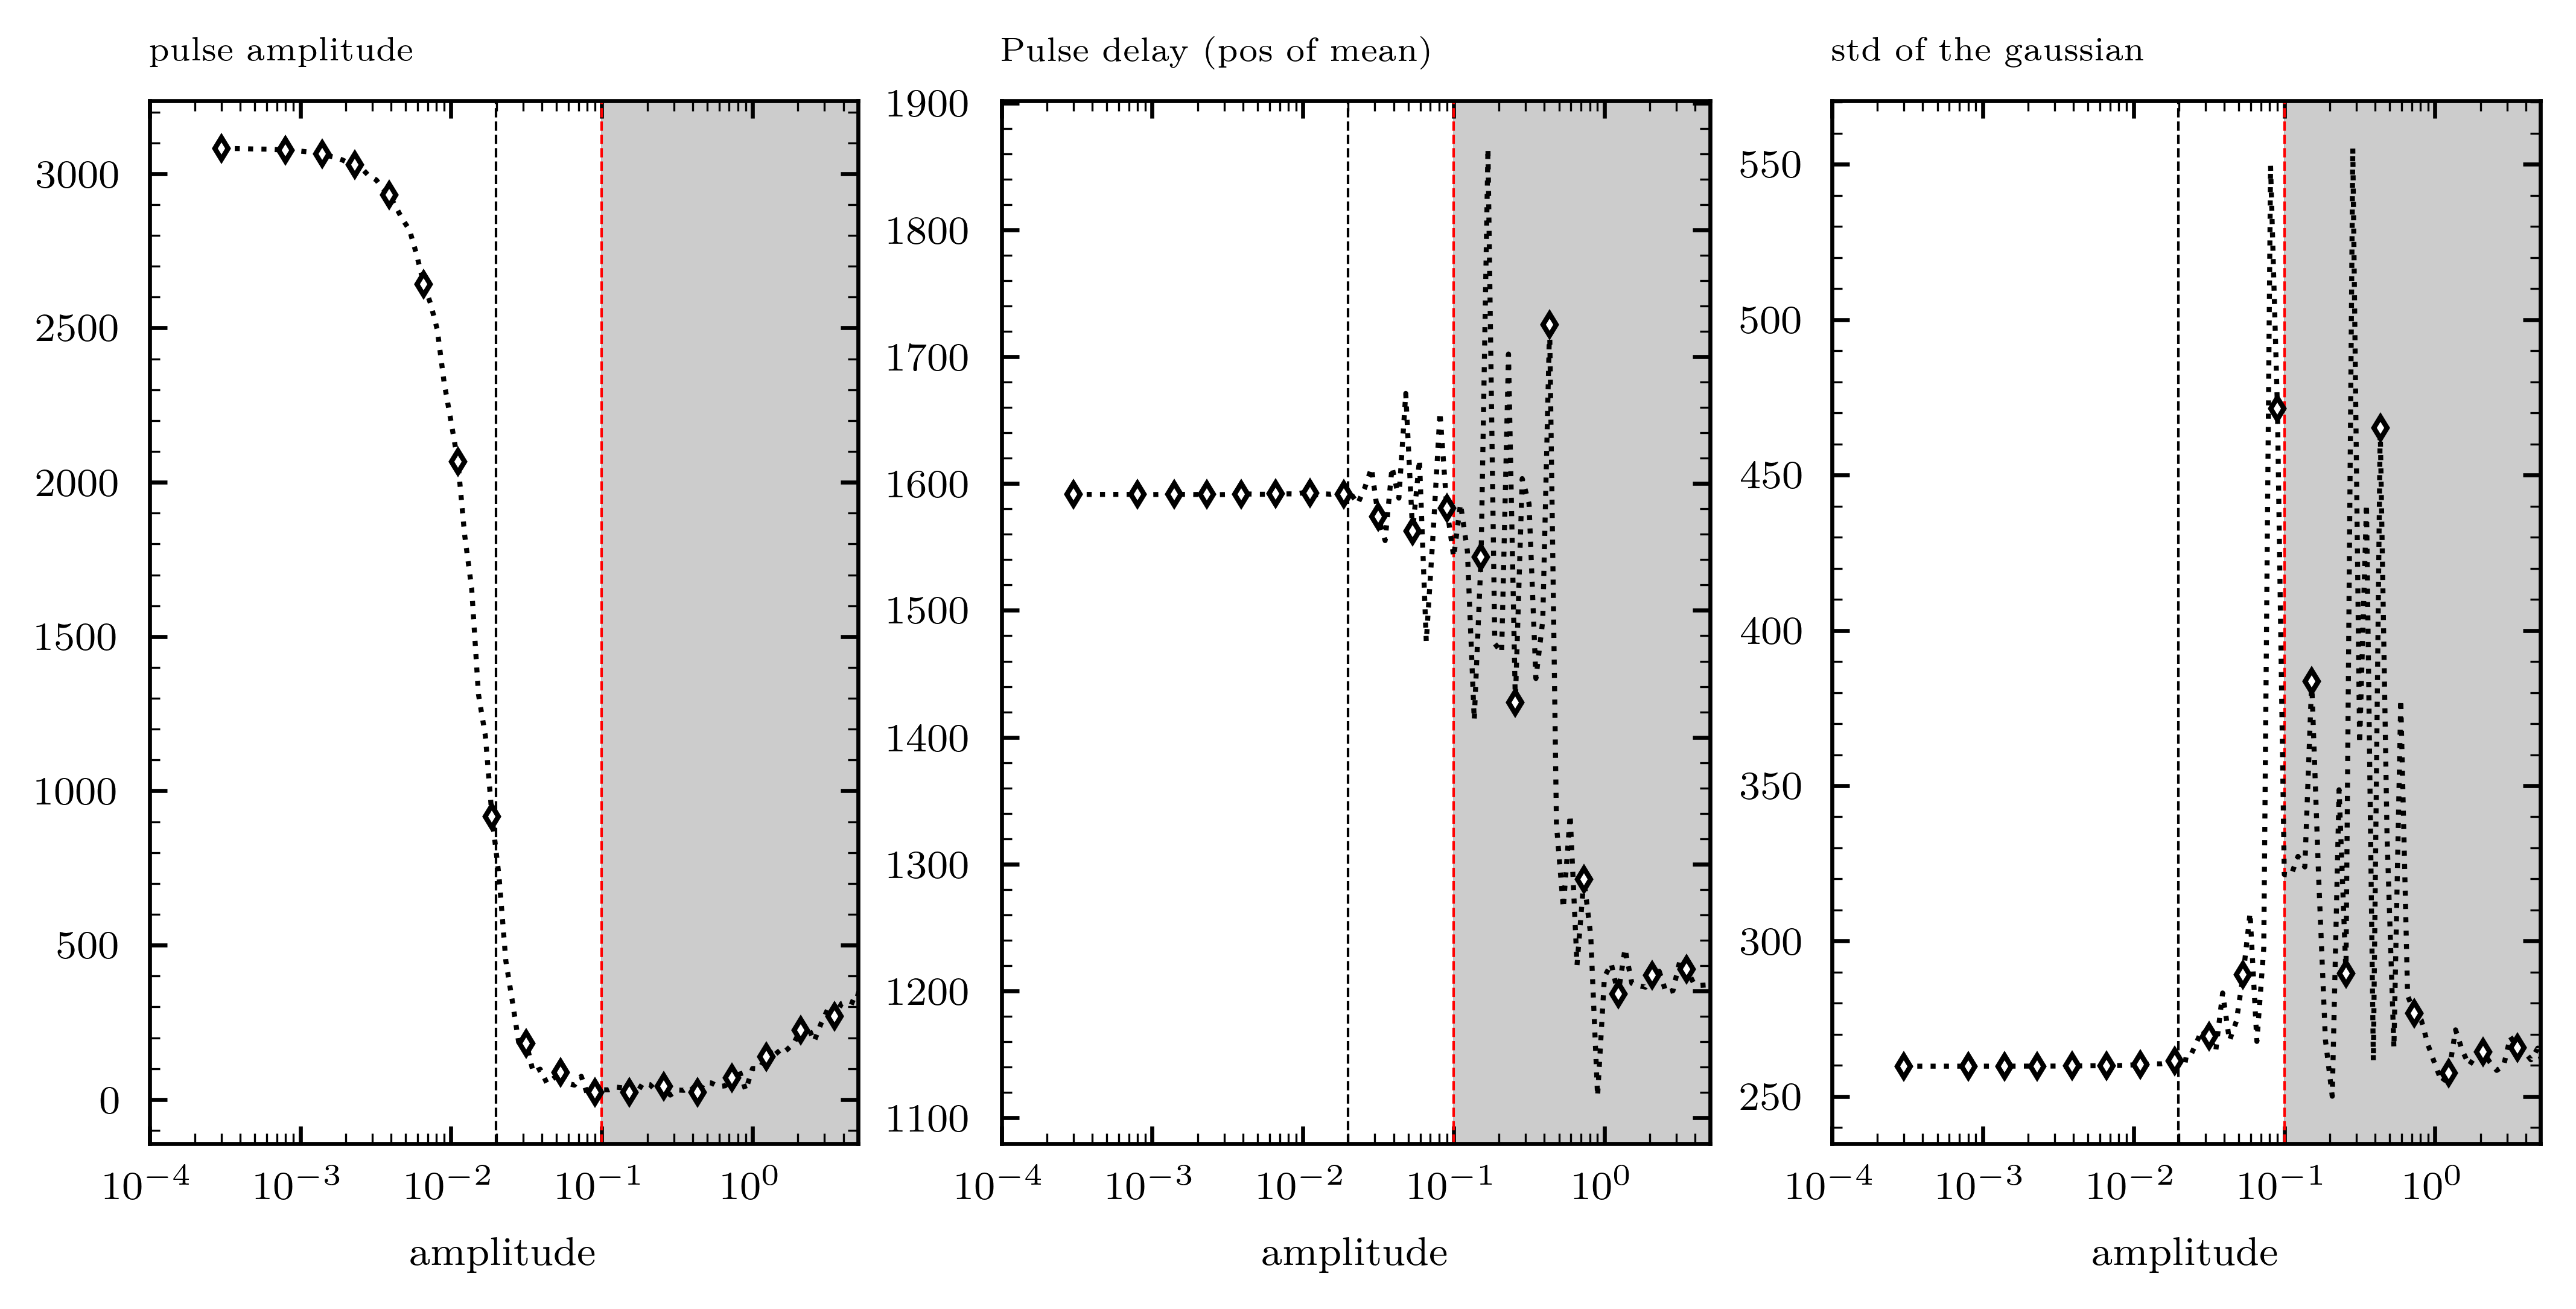

In [29]:
W = 7
fig, ax = plt.subplots(1,3, figsize = (W, W * 2/4))

ax[0].set_title('pulse amplitude', fontsize='small',
    loc='left',
    fontweight='bold',
    style='italic',)
ax[0].axvline(0.1, color = 'r', ls = '--', lw = .5)
ax[0].axvline(nc2, color = 'k', ls = '--', lw = .5)
ax[0].plot(amplitude_norm[index], cf[:,0][index], marker = 'd', label = 'delay', lw = 1, markevery = 5, ms = 3, mfc = 'white', color = 'k', ls = ':')
ax[0].set_xlim(1e-4, 5)
ax[0].axvspan(0.1, 5, alpha = 0.2, color = 'k')
ax[0].set_xscale('log')
ax[0].set_xlabel('amplitude')

ax[1].set_title('Pulse delay (pos of mean)', fontsize='small',
    loc='left',
    fontweight='bold',
    style='italic',)
ax[1].axvline(0.1, color = 'r', ls = '--', lw = .5)
ax[1].axvline(nc2, color = 'k', ls = '--', lw = .5)
ax[1].plot(amplitude_norm[index], cf[:,1][index], marker = 'd', label = 'delay', lw = 1, markevery = 5, ms = 3, mfc = 'white', color = 'k', ls = ':')
ax[1].set_xlim(1e-4, 5)
ax[1].axvspan(0.1, 5, alpha = 0.2, color = 'k')
ax[1].set_xscale('log')
ax[1].set_xlabel('amplitude')

ax[2].set_title('std of the gaussian', fontsize='small',
    loc='left',
    fontweight='bold',
    style='italic',)
ax[2].axvline(0.1, color = 'r', ls = '--', lw = .5)
ax[2].axvline(nc2, color = 'k', ls = '--', lw = .5)
ax[2].plot(amplitude_norm[index], cf[:,2][index], marker = 'd', label = 'delay', lw = 1, markevery = 5, ms = 3, mfc = 'white', color = 'k', ls = ':')
ax[2].set_xlim(1e-4, 5)
ax[2].axvspan(0.1, 5, alpha = 0.2, color = 'k')
ax[2].set_xscale('log')
ax[2].set_xlabel('amplitude')

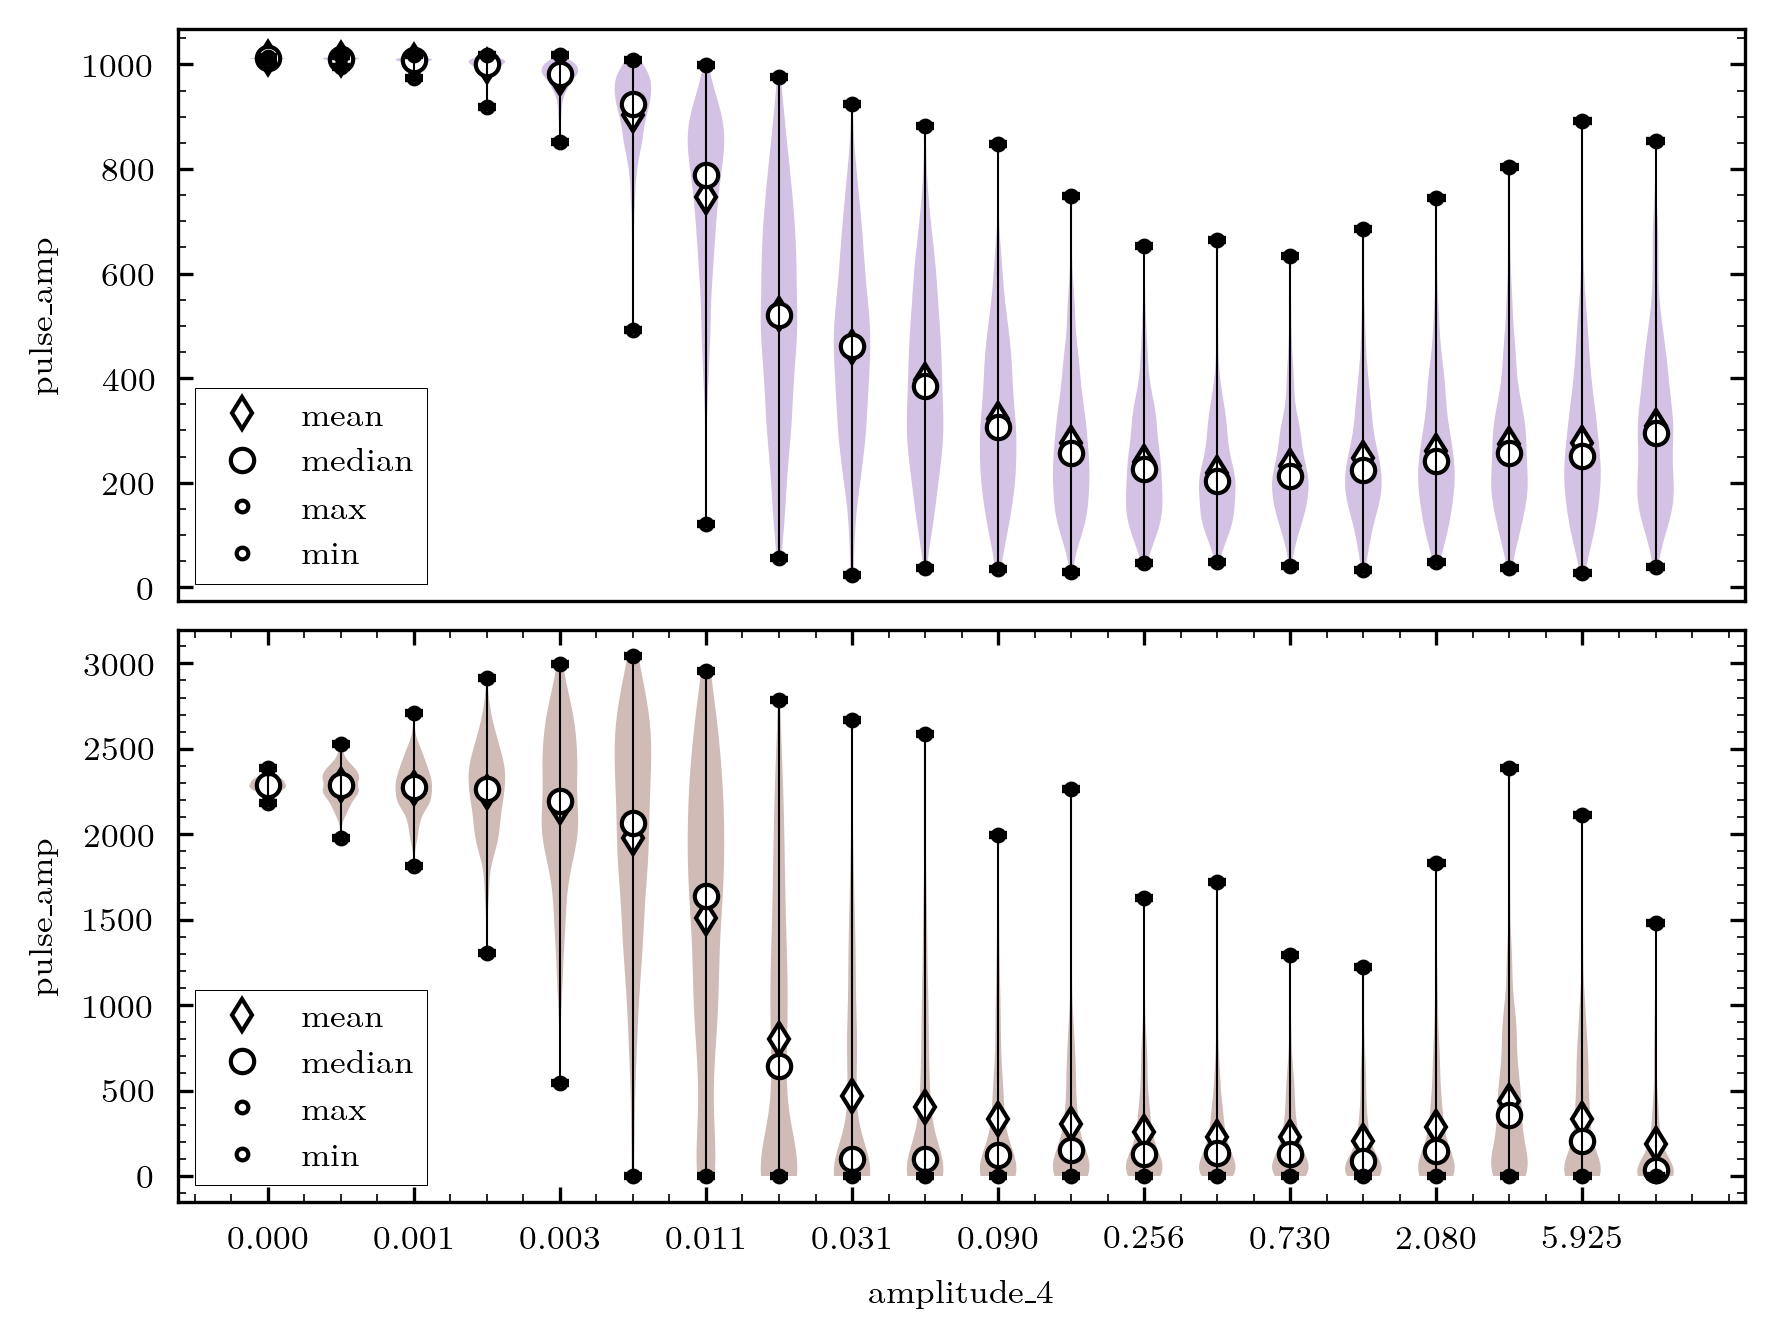

In [151]:
W = 5.8    # Figure width in inches, approximately A4-width - 2*1.25in margin
fig, axs = plt.subplots(2, 1, figsize = (W, W * 3 / 4), dpi = 300)

ax, ax2 = axs
ax.plot(range(1, len( np.array(amplitude_norm)[index][::5]) + 1), np.mean(amp, axis = 1)[index][::5], lw = 0, marker = 'd', mfc = 'w', mec = 'k', mew = 1 , label = 'mean')
ax.plot(range(1, len( np.array(amplitude_norm)[index][::5]) + 1), np.median(amp, axis = 1)[index][::5], lw = 0, marker = 'o', mfc = 'w', mec = 'k', mew = 1. , label = 'median')
ax.plot(range(1, len( np.array(amplitude_norm)[index][::5]) + 1), np.max(amp, axis = 1)[index][::5], lw = 0, marker = '.', mfc = 'none', mec = 'k', mew = 1. , label = 'max')
ax.plot(range(1, len( np.array(amplitude_norm)[index][::5]) + 1), np.min(amp, axis = 1)[index][::5], lw = 0, marker = '.', mfc = 'none', mec = 'k', mew = 1, label = 'min')
violins = ax.violinplot(np.array(amp)[index][::5, :].real.T, showmeans=False, showmedians=False)


ax.set_ylabel('pulse_amp')
ax.set_xticks([])
for pc in violins['bodies']:
    pc.set_alpha(.4)
violins['cbars'].set_color('k')
violins['cbars'].set_linewidth(.5)
violins['cmaxes'].set_color('k')
violins['cmins'].set_color('k')
ax.legend()
amp2 = np.max(pulse_norm, axis = 2)
ax2.plot([],[])

ax2.plot(range(1, len( np.array(amplitude_norm)[index][::5]) + 1), np.mean(amp2, axis = 1)[index][::5], lw = 0, marker = 'd', mfc = 'w', mec = 'k', mew = 1 , label = 'mean')
ax2.plot(range(1, len( np.array(amplitude_norm)[index][::5]) + 1), np.median(amp2, axis = 1)[index][::5], lw = 0, marker = 'o', mfc = 'w', mec = 'k', mew = 1. , label = 'median')
ax2.plot(range(1, len( np.array(amplitude_norm)[index][::5]) + 1), np.max(amp2, axis = 1)[index][::5], lw = 0, marker = '.', mfc = 'none', mec = 'k', mew = 1. , label = 'max')
ax2.plot(range(1, len( np.array(amplitude_norm)[index][::5]) + 1), np.min(amp2, axis = 1)[index][::5], lw = 0, marker = '.', mfc = 'none', mec = 'k', mew = 1, label = 'min')
violins = ax2.violinplot(np.array(amp2)[index][::5,:].real.T, showmeans=False, showmedians=False)


ax2.set_xticks(range(1, len( np.array(amplitude_norm)[index][::5]) + 1, 2))
ax2.set_xticklabels([str(r)[:5] for r in np.array(amplitude_norm)[index][::10]])
ax2.set_xlabel('amplitude_norm')
ax2.set_ylabel('pulse_amp')
for pc in violins['bodies']:
    pc.set_alpha(.4)
violins['cbars'].set_color('k')
violins['cbars'].set_linewidth(.5)
violins['cmaxes'].set_color('k')
violins['cmins'].set_color('k')
ax2.legend()
plt.show()


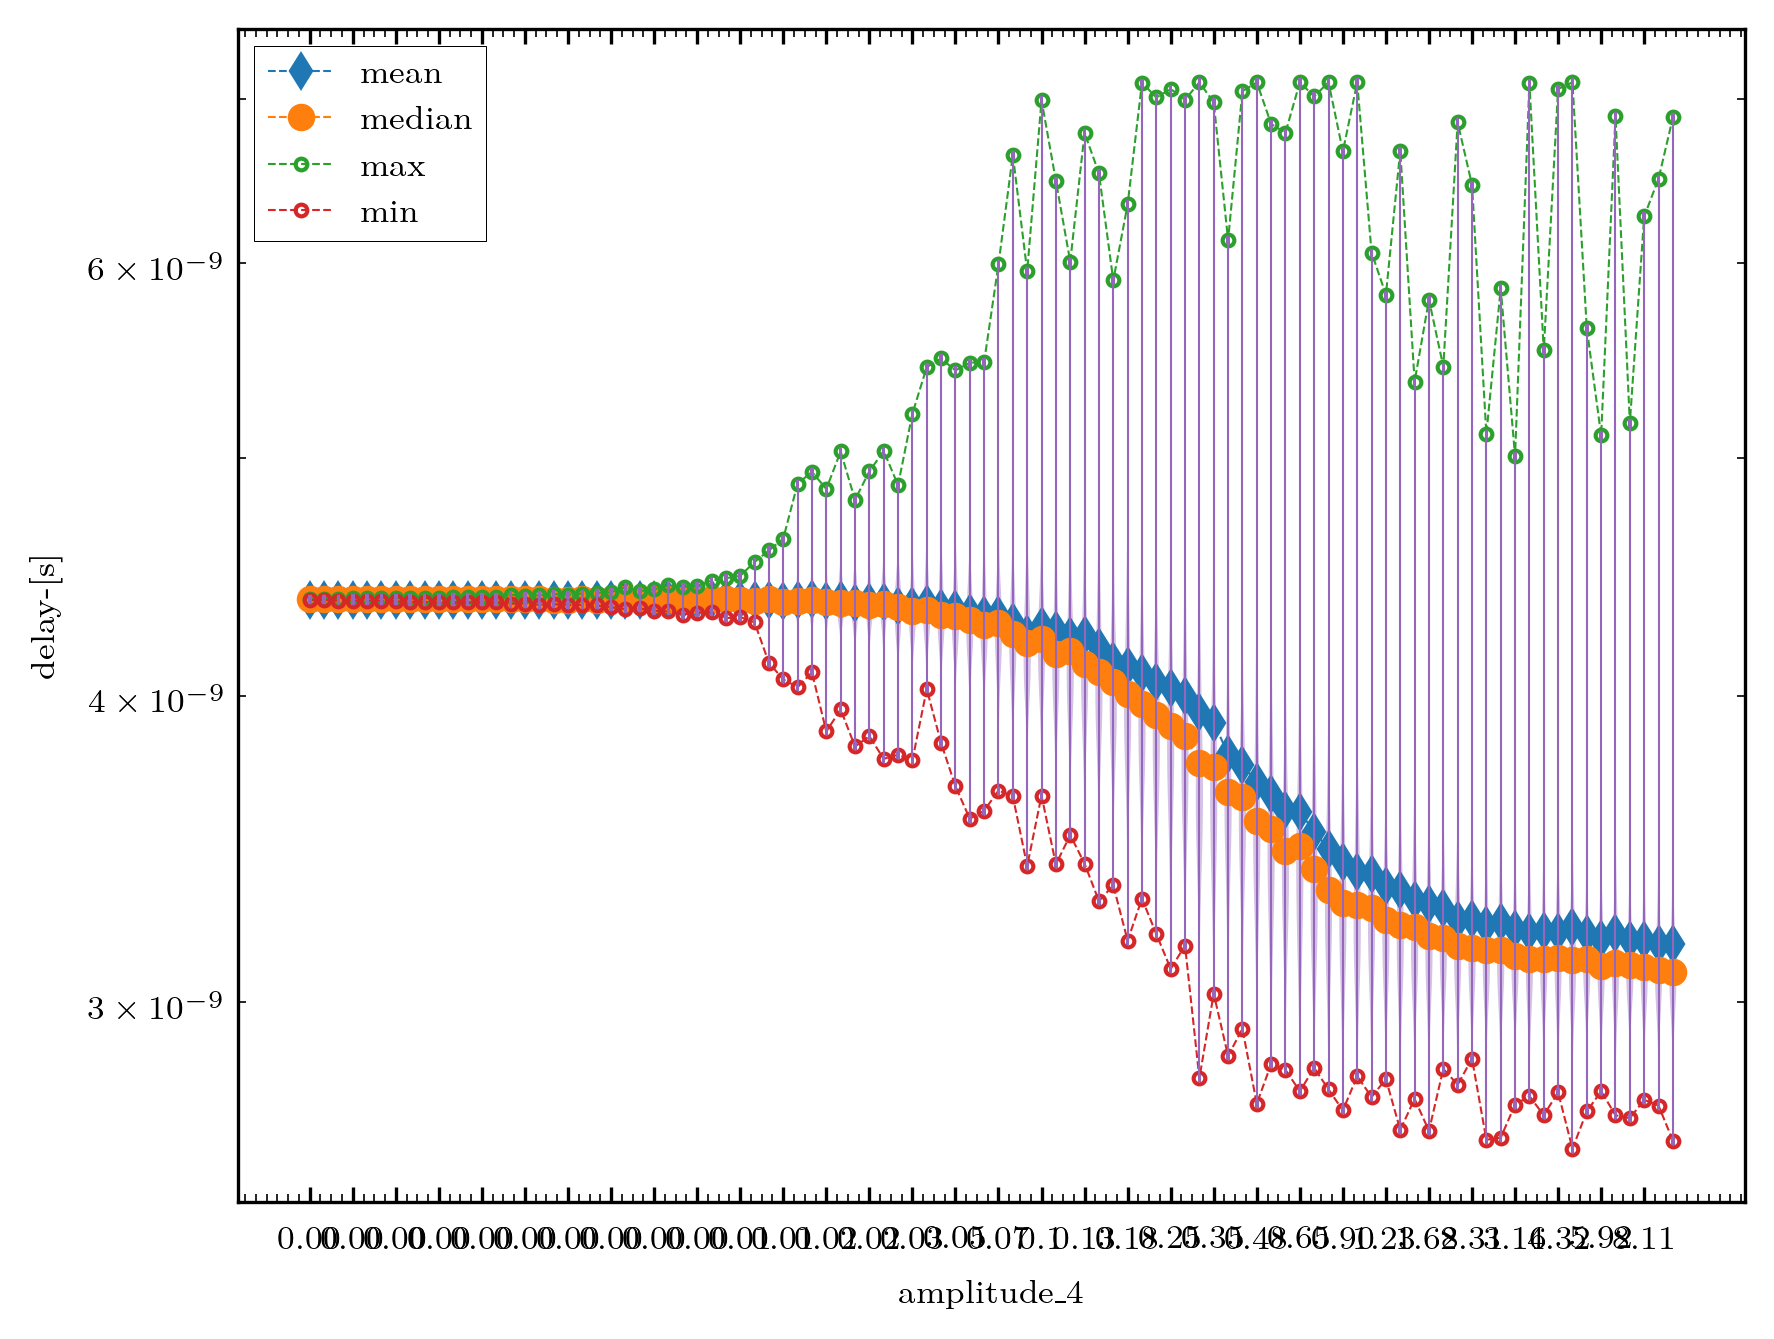

In [84]:
W = 5.8    # Figure width in inches, approximately A4-width - 2*1.25in margin
fig, ax = plt.subplots(1, figsize = (W, W * 3 / 4), dpi = 300)

ax.plot(range(1, len( np.array(amplitude_norm)[index]) + 1), np.mean(delay_list_norm, axis = 1)[index], lw = .5, marker = 'd', mew = 1 ,ls = '--', label = 'mean')
ax.plot(range(1, len( np.array(amplitude_norm)[index]) + 1), np.median(delay_list_norm, axis = 1)[index], lw = .5, marker = 'o', mew = 1. ,ls = '--', label = 'median')
ax.plot(range(1, len( np.array(amplitude_norm)[index]) + 1), np.max(delay_list_norm, axis = 1)[index], lw = .5, marker = '.', mfc = 'none', mew = 1. ,ls = '--', label = 'max')
ax.plot(range(1, len( np.array(amplitude_norm)[index]) + 1), np.min(delay_list_norm, axis = 1)[index], lw = .5, marker = '.', mfc = 'none', mew = 1, ls = '--', label = 'min')
violins = ax.violinplot(np.array(delay_list_norm)[index].real.T, showmeans=False, showmedians=False)

ax.set_yscale('log')

ax.set_xticks(range(1, len( np.array(amplitude_norm)[index]) + 1, 3))
ax.set_xticklabels([str(r)[:4] for r in np.array(amplitude_norm)[index][::3]])
ax.set_xlabel('amplitude_norm')
ax.set_ylabel('delay-[s]')

for pc in violins['bodies']:

    pc.set_alpha(.4)

violins['cbars'].set_linewidth(.5)

ax.legend()
plt.show()


/home/andrea/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_70224/3723487253.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(np.array(delay_list_4)[index][i].real, ax = ax, lw = 1, palette=plt.cm.viridis(i/30))
/home/andrea/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/andrea/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

(4.3e-09, 4.45e-09)

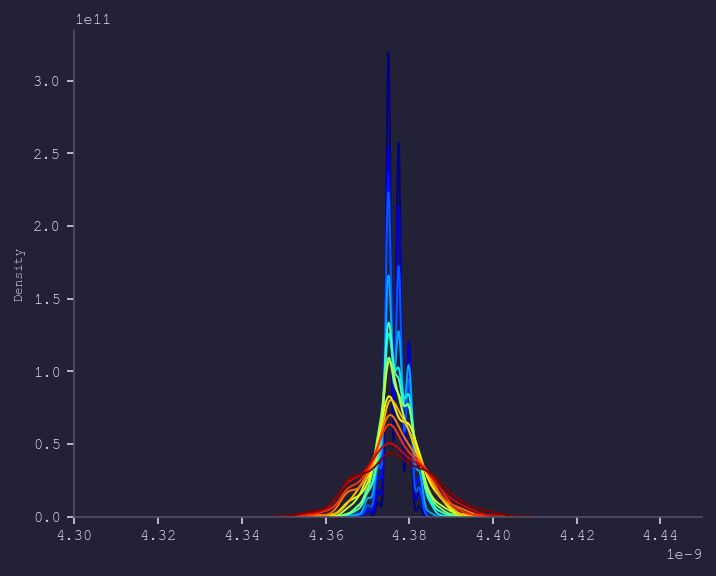

In [58]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (5, 4))
ax.set_prop_cycle(color=plt.cm.jet(np.linspace(0, 1, 15)))
for i in range(5,20,1) : 
    sns.kdeplot(np.array(delay_list_norm)[index][i].real, ax = ax, lw = 1, palette=plt.cm.viridis(i/30))
ax.set_xlim(4.3e-9, 4.45e-9)


In [262]:
skew(abs(pulse_norm[0,0]), bias = False)

1.26827585010689

In [1]:
from scipy.signal import find_peaks


NameError: name 'pulse_4' is not defined

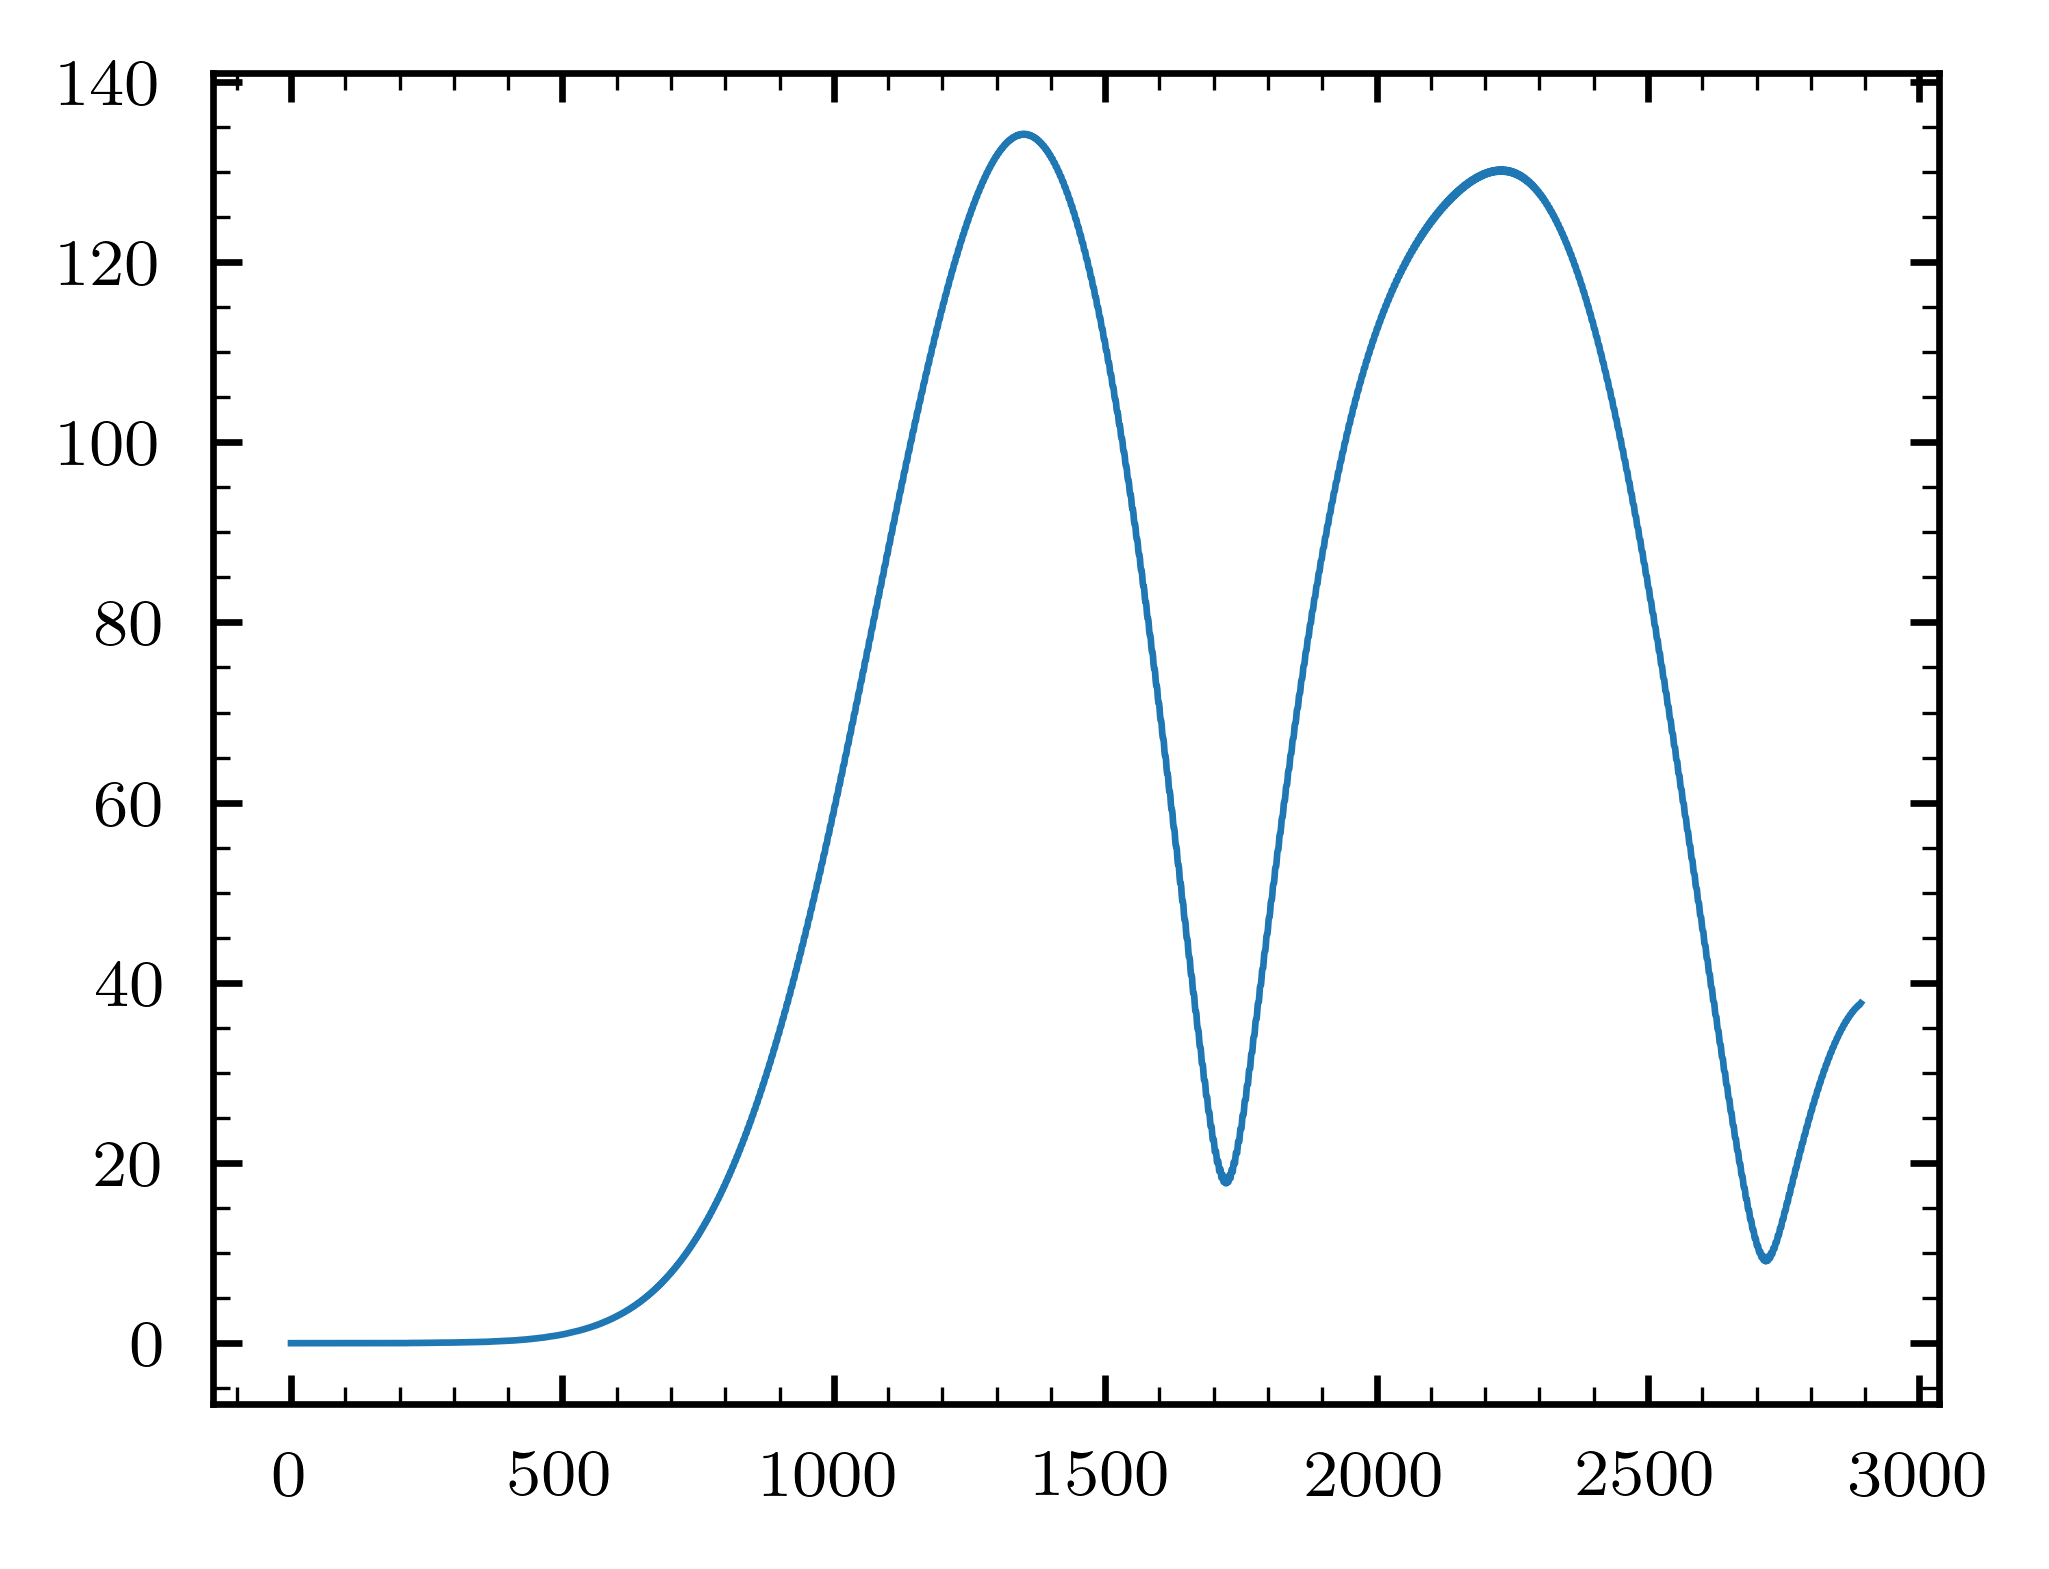

In [73]:
fig, ax = plt.subplots()
plot = ax.plot(abs(pulse_norm[index][70,100]), lw = .8)
plt.show()

In [8]:
L = 10
x = np.linspace(0,L, 100)


In [ ]:

n = (1.25 - (1.5 * L - x)**2 / L**2)

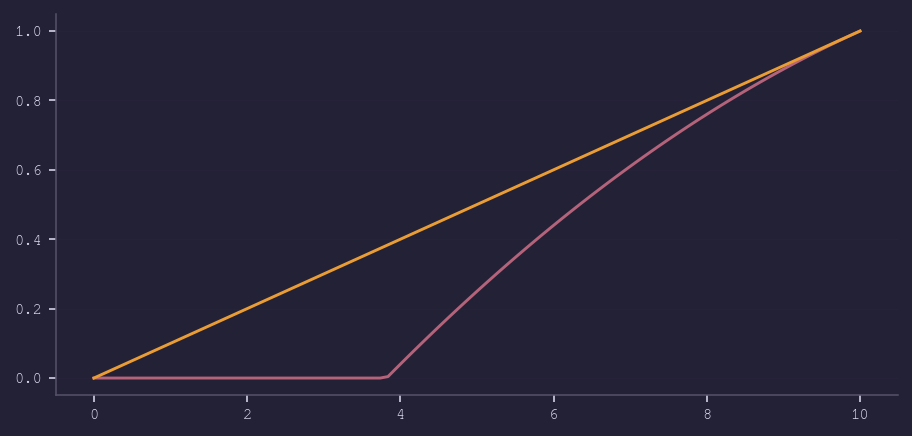

In [11]:
fig, ax = plt.subplots()
ax.plot(x, np.fmax(n,0))
ax.plot(x, x/L)